# get pure and non-pure


In [15]:
all_data = pd.read_csv("../../Data/Mixed_HGP/True_Label/scans_used_all_info.csv")

pure = all_data[(all_data['dHGP'] == 100) | (all_data['rHGP'] == 100) | (all_data['pHGP'] == 100)]
non_pure = all_data[(all_data['dHGP'] != 100) & (all_data['rHGP'] != 100) & (all_data['pHGP'] != 100)]

In [3]:
from sklearn.model_selection import StratifiedShuffleSplit, StratifiedGroupKFold
import numpy as np
import pandas as pd
import os


stratified_split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

all_data = pd.read_csv('../Experiments/data_info/per_tumor_bbx_expand_2_05.csv')
all_labels = all_data['HGP_Type']
#filter size > quantile 0.25


C:\Users\098986\AppData\Local\Temp\ipykernel_25100\4071857473.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


# get mask data path

In [113]:
fold = 5
train_name = 'train_cv_'
vali_name = 'val_cv_'
mask_files_lst = os.listdir('../../Data/Mixed_HGP/per_tumor_lv_+5_07071/')
train_data = os.listdir('../../Data/Mixed_HGP/per_tumor_lv_mask_+5_07071/')
for i in range(fold):
    train_fold = train_name + str(i) + '.csv'
    vali_fold = vali_name + str(i) + '.csv'
    train_csv = pd.read_csv(f'../../Data/Mixed_HGP/True_Label/Largest_Tumor/{train_fold}')
    vali_csv = pd.read_csv(f'../../Data/Mixed_HGP/True_Label/Largest_Tumor/{vali_fold}')
    
    

In [114]:
from sklearn.model_selection import StratifiedKFold
import pandas as pd
Prefix = 'CILM_'
Suffix = '.nii.gz'
all_data = pd.read_csv('../../Data/Mixed_HGP/True_Label/scans_used_all_info.csv')
mask_data = pd.DataFrame(os.listdir('../../Data/Mixed_HGP/largest_tm_lv_slices_mask_+5/'))
raw_data = pd.DataFrame(os.listdir('../../Data/Mixed_HGP/largest_tm_lv_slices_window_+5/'))
len(raw_data)

249

In [140]:
#per tumor
from sklearn.model_selection import StratifiedKFold
import pandas as pd
Prefix = 'CILM_'
Suffix = '.nii.gz'
all_data = pd.read_csv('../../Data/Mixed_HGP/True_Label/Per_tumor/per_tumor_bbx.csv')
mask_data = pd.DataFrame(os.listdir('../../Data/Mixed_HGP/per_tumor_lv_mask_+5_07071/'))
raw_data = pd.DataFrame(os.listdir('../../Data/Mixed_HGP//per_tumor_lv_+5_07071/'))

In [52]:
stratify_kfold = StratifiedKFold(n_splits=5,shuffle=True,random_state=42)
stratify_group_kfold = StratifiedGroupKFold(n_splits=5,shuffle=True,random_state=42)
label = all_data['HGP_Type']
#all_data['Sample'] = all_data.apply(lambda x: x['Sample'][0:18]+str(x['tumor_id'])+'.nii.gz',axis=1)
for i,(tr_idx,val_idx) in enumerate(stratify_kfold.split(all_data,label)):
    train_data = all_data.loc[tr_idx]
    val_data = all_data.loc[val_idx]
    train_mask_data = mask_data.iloc[tr_idx]
    val_mask_data = mask_data.iloc[val_idx]
    train_data_path = raw_data.iloc[tr_idx]
    vali_data_path = raw_data.iloc[val_idx]

    train_data['data_path'] = train_data_path
    val_data['data_path'] = vali_data_path
    train_data['mask_path'] = train_mask_data
    val_data['mask_path'] = val_mask_data
    #train_data.to_csv('../../Data/Mixed_HGP/True_Label/largest_tm_lv_+5_mask/train_cv_'+str(i)+'.csv',index=False)
    #val_data.to_csv('../../Data/Mixed_HGP/True_Label/largest_tm_lv_+5_mask/val_cv_'+str(i)+'.csv',index=False)
    


In [145]:
#filter quantile >0.25
all_data_025 = all_data[all_data['tumor_size'] > all_data['tumor_size'].quantile(0.25)]
raw_data_025 = raw_data.iloc[all_data_025.index,]
mask_data_025 = mask_data.iloc[all_data_025.index,]

In [150]:
#reset index
all_data_025.reset_index(drop=True, inplace=True)
raw_data_025.reset_index(drop=True, inplace=True)
mask_data_025.reset_index(drop=True, inplace=True)




In [151]:
#change variable
all_data = all_data_025
raw_data = raw_data_025
mask_data = mask_data_025


In [154]:
#stratify_kfold = StratifiedKFold(n_splits=5,shuffle=True,random_state=42)
stratify_group_kfold = StratifiedGroupKFold(n_splits=5,shuffle=True,random_state=42)
label = all_data['HGP_Type']
#all_data['Sample'] = all_data.apply(lambda x: x['Sample'][0:18]+str(x['tumor_id'])+'.nii.gz',axis=1)


#filter size > quantile 0.25
#all_data = all_data[all_data['tumor_size'] > all_data['tumor_size'].quantile(0.25)]


for i,(tr_idx,val_idx) in enumerate(stratify_group_kfold.split(all_data,label,groups=all_data['sample_id'])):
    train_data = all_data.loc[tr_idx]
    val_data = all_data.loc[val_idx]
    train_mask_data = mask_data.iloc[tr_idx]
    val_mask_data = mask_data.iloc[val_idx]
    train_data_path = raw_data.iloc[tr_idx]
    vali_data_path = raw_data.iloc[val_idx]
    train_data['data_path'] = train_data_path
    val_data['data_path'] = vali_data_path
    train_data['mask_path'] = train_mask_data
    val_data['mask_path'] = val_mask_data
    train_data.to_csv('../../Data/Mixed_HGP/True_Label/Per_tumor_by_group_quantile_025/train_cv_'+str(i)+'.csv',index=False)
    val_data.to_csv('../../Data/Mixed_HGP/True_Label//val_cv_'+str(i)+'.csv',index=False)


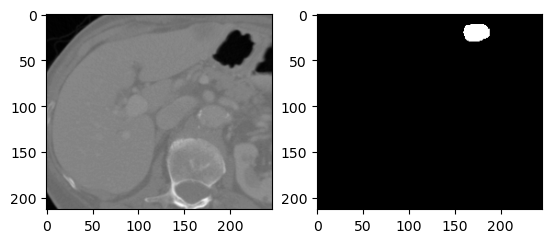

In [173]:
import SimpleITK as sitk
img_1 = sitk.ReadImage('../../Data/Mixed_HGP/per_tumor_lv_+5_07071/CILM_CT_100330_0001.nii.gz')
img_2 = sitk.ReadImage('../../Data/Mixed_HGP/per_tumor_lv_mask_+5_07071//CILM_CT_100330_0001.nii.gz')

import matplotlib.pyplot as plt
#1x2 subplot
plt.subplot(1,2,1)

#plot the first image


plt.imshow(sitk.GetArrayFromImage(img_1)[11,:,:],cmap='gray')
plt.subplot(1,2,2)
plt.imshow(sitk.GetArrayFromImage(img_2)[11,:,:],cmap='gray')


In [152]:
drop_out = nn.Dropout2d(p=0)

drop_out(a)

tensor([[[[3.8283e-01, 3.4610e-01, 4.6232e-01, 2.0274e-01],
          [8.8563e-01, 7.5062e-01, 4.1274e-01, 9.7509e-01],
          [1.9613e-01, 3.1676e-01, 5.8799e-01, 7.7582e-01],
          [9.8915e-01, 7.1190e-01, 9.7465e-01, 6.2148e-02]],

         [[6.8797e-01, 7.1243e-01, 5.1766e-01, 5.6590e-01],
          [1.9968e-04, 1.2627e-01, 9.4326e-01, 5.3759e-02],
          [5.3269e-01, 6.4584e-01, 9.1529e-01, 4.4003e-01],
          [9.3151e-01, 2.3267e-01, 5.5729e-01, 3.1262e-01]],

         [[1.5373e-01, 5.4967e-01, 4.6523e-01, 8.5409e-02],
          [3.1850e-01, 4.4704e-01, 6.0167e-01, 3.7988e-01],
          [3.0570e-01, 3.2309e-01, 5.3153e-01, 6.3549e-01],
          [5.3991e-02, 8.1339e-01, 9.3485e-02, 6.0316e-01]]]])

: 

In [134]:
from sympy import Ne
from torch import ne
import torch.nn as nn

a = torch.rand(1,3,4,4)
drop_out = nn.Dropout2d(p=0.5)
drop_out(a)


class Net(nn.Module):  # Ensure that your class correctly inherits from nn.Module
    def __init__(self):
        super(Net, self).__init__()  # Initialize the parent class
        # Now you can safely assign modules
        self.drop_out = nn.Dropout2d(p=0.5)
    
    def forward(self, x):
        # Your forward pass definition
        x = self.drop_out(x)
        return x

net = Net()  # Now this should work without throwing an error



In [139]:
a

tensor([[[[3.8283e-01, 3.4610e-01, 4.6232e-01, 2.0274e-01],
          [8.8563e-01, 7.5062e-01, 4.1274e-01, 9.7509e-01],
          [1.9613e-01, 3.1676e-01, 5.8799e-01, 7.7582e-01],
          [9.8915e-01, 7.1190e-01, 9.7465e-01, 6.2148e-02]],

         [[6.8797e-01, 7.1243e-01, 5.1766e-01, 5.6590e-01],
          [1.9968e-04, 1.2627e-01, 9.4326e-01, 5.3759e-02],
          [5.3269e-01, 6.4584e-01, 9.1529e-01, 4.4003e-01],
          [9.3151e-01, 2.3267e-01, 5.5729e-01, 3.1262e-01]],

         [[1.5373e-01, 5.4967e-01, 4.6523e-01, 8.5409e-02],
          [3.1850e-01, 4.4704e-01, 6.0167e-01, 3.7988e-01],
          [3.0570e-01, 3.2309e-01, 5.3153e-01, 6.3549e-01],
          [5.3991e-02, 8.1339e-01, 9.3485e-02, 6.0316e-01]]]])

In [140]:
net.train()
net(a)

tensor([[[[7.6567e-01, 6.9220e-01, 9.2463e-01, 4.0548e-01],
          [1.7713e+00, 1.5012e+00, 8.2547e-01, 1.9502e+00],
          [3.9225e-01, 6.3352e-01, 1.1760e+00, 1.5516e+00],
          [1.9783e+00, 1.4238e+00, 1.9493e+00, 1.2430e-01]],

         [[1.3759e+00, 1.4249e+00, 1.0353e+00, 1.1318e+00],
          [3.9935e-04, 2.5254e-01, 1.8865e+00, 1.0752e-01],
          [1.0654e+00, 1.2917e+00, 1.8306e+00, 8.8006e-01],
          [1.8630e+00, 4.6534e-01, 1.1146e+00, 6.2524e-01]],

         [[3.0745e-01, 1.0993e+00, 9.3046e-01, 1.7082e-01],
          [6.3700e-01, 8.9407e-01, 1.2033e+00, 7.5977e-01],
          [6.1140e-01, 6.4617e-01, 1.0631e+00, 1.2710e+00],
          [1.0798e-01, 1.6268e+00, 1.8697e-01, 1.2063e+00]]]])

In [141]:
net.eval()
net(a)

tensor([[[[3.8283e-01, 3.4610e-01, 4.6232e-01, 2.0274e-01],
          [8.8563e-01, 7.5062e-01, 4.1274e-01, 9.7509e-01],
          [1.9613e-01, 3.1676e-01, 5.8799e-01, 7.7582e-01],
          [9.8915e-01, 7.1190e-01, 9.7465e-01, 6.2148e-02]],

         [[6.8797e-01, 7.1243e-01, 5.1766e-01, 5.6590e-01],
          [1.9968e-04, 1.2627e-01, 9.4326e-01, 5.3759e-02],
          [5.3269e-01, 6.4584e-01, 9.1529e-01, 4.4003e-01],
          [9.3151e-01, 2.3267e-01, 5.5729e-01, 3.1262e-01]],

         [[1.5373e-01, 5.4967e-01, 4.6523e-01, 8.5409e-02],
          [3.1850e-01, 4.4704e-01, 6.0167e-01, 3.7988e-01],
          [3.0570e-01, 3.2309e-01, 5.3153e-01, 6.3549e-01],
          [5.3991e-02, 8.1339e-01, 9.3485e-02, 6.0316e-01]]]])

In [13]:
from sympy import Ne
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms

class Net(nn.Module):
    def __init__(self) -> None:
        self.drop_out = F.dropout2d(p=0.5,training=True)
        self.conv2d = nn.Conv2d(3,3)
    
    def forward(self,x):
        x = self.conv2d(x)
        x = self.drop_out(x)
        return x

rand_data = torch.rand(1,3,64,64)
net = Net()



TypeError: dropout2d() missing 1 required positional argument: 'input'

In [88]:

all_data = all_data[all_data['tumor_size'] > all_data['tumor_size'].quantile(0.25)]
all_labels = all_data['HGP_Type']

In [45]:
all_data.reset_index(drop=True, inplace=True)
all_labels.reset_index(drop=True, inplace=True)

In [46]:
stratified_split.split(all_data, all_labels)

for train_index, test_index in stratified_split.split(all_data, all_labels):
    strat_train_set = all_data.loc[train_index]
    strat_test_set = all_data.loc[test_index]

In [47]:
strat_test_set.reset_index(drop=True, inplace=True)
strat_train_set.reset_index(drop=True, inplace=True)

In [51]:
strat_test_set.HGP_Type.value_counts() 

HGP_Type
0    107
1     25
Name: count, dtype: int64

In [8]:
strat_test_set.to_csv('../../Data/Mixed_HGP/True_Label/test_set.csv', index=False)
strat_train_set.to_csv('../../Data/Mixed_HGP/True_Label/train_set.csv', index=False)

In [53]:
strat_train_set

,Sample,min_row,min_col,min_slice,max_row,max_col,max_slice,sample,tumor_size,sample_id,tumor_id,HGP_Type
0,CILM_CT_327030_0000.nii.gz,111,121,145,181,194,170,32703,798,183,4,0
1,CILM_CT_186180_0000.nii.gz,168,226,316,266,353,359,18618,560,62,0,1
2,CILM_CT_232880_0000.nii.gz,38,198,107,67,306,123,23288,325,103,1,0
3,CILM_CT_272320_0000.nii.gz,86,226,67,142,359,84,27232,741,139,0,0
4,CILM_CT_152830_0000.nii.gz,43,189,50,90,311,70,15283,4470,48,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
522,CILM_CT_238270_0000.nii.gz,152,99,292,240,161,331,23827,477,109,2,0
523,CILM_CT_207370_0000.nii.gz,72,262,345,120,406,391,20737,830,80,0,1
524,CILM_CT_318640_0000.nii.gz,94,154,345,151,241,391,31864,535,169,2,0
525,CILM_CT_271670_0000.nii.gz,91,270,326,152,421,371,27167,1072,138,1,1


In [54]:
name_0 = 'CILM_'
name_1 = '_0000.nii.gz'
train_name = strat_train_set.sample.tolist()
test_name = strat_test_set.sample.tolist()
train_name = [name_0  + str(i) + '0' + name_1 for i in train_name]
test_name = [name_0  + str(i) + '0' + name_1 for i in test_name]

AttributeError: 'function' object has no attribute 'tolist'

In [25]:
#move these files from the original folder to the new folder
import shutil
import os
for i in test_name:
    shutil.copy('../../Data/Mixed_HGP/Mixed_HGP_Only_Liver_07073_Windowed/' + i, '../../Data/Mixed_HGP/Mixed_HGP_Only_Liver_07073_Windowed_Test/')


In [101]:
from sklearn.model_selection import StratifiedKFold
import pandas as pd
stratify_kfold = StratifiedKFold(n_splits=5,shuffle=True,random_state=42)
data_info = pd.read_csv('../Experiments/data_info/per_tumor_bbx_expand_3_07071.csv')
data_info = data_info[data_info['tumor_size'] > data_info['tumor_size'].quantile(0.25)]
data_info.reset_index(drop=True, inplace=True)
data_info

,Sample,min_row,min_col,min_slice,max_row,max_col,max_slice,sample,tumor_size,sample_id,tumor_id,row_depth,col_depth,slice_depth
0,CILM_CT_100330_0000.nii.gz,127,127,114,144,143,131,10033,858,0,0,17,16,17
1,CILM_CT_100330_0000.nii.gz,194,100,130,238,131,154,10033,5306,0,1,44,31,24
2,CILM_CT_100430_0000.nii.gz,113,286,279,129,298,290,10043,428,1,0,16,12,11
3,CILM_CT_100430_0000.nii.gz,182,181,372,192,191,380,10043,148,1,2,10,10,8
4,CILM_CT_100430_0000.nii.gz,285,223,380,300,234,385,10043,206,1,3,15,11,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
654,CILM_CT_975750_0000.nii.gz,116,252,-4,156,295,16,97575,5129,247,0,40,43,20
655,CILM_CT_975750_0000.nii.gz,183,193,15,200,205,30,97575,695,247,1,17,12,15
656,CILM_CT_994000_0000.nii.gz,187,107,297,207,127,324,99400,1488,248,0,20,20,27
657,CILM_CT_994000_0000.nii.gz,85,198,324,128,234,351,99400,4491,248,1,43,36,27


In [5]:
from sklearn.model_selection import StratifiedKFold
import pandas as pd
stratify_kfold = StratifiedKFold(n_splits=3,shuffle=True,random_state=42)

In [1]:
import pandas as pd
all_data = pd.read_csv('../../Data/Mixed_HGP/True_Label/scans_used_all_info_pure.csv')


C:\Users\098986\AppData\Local\Temp\ipykernel_18080\1278606756.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [ ]:
#filter size > quantile 0.25
all_data = all_data[all_data['tumor_size'] > all_data['tumor_size'].quantile(0.25)]
all_labels = all_data['HGP_Type']
all_data.reset_index(drop=True, inplace=True)

In [3]:
all_data

,PID,Subject,Experiment,Scan,pHGP,dHGP,rHGP,HGP_Type,Series_description,acquisition_time,...,scan_options,seriesdate_y,gender,age,model_name,patient_position,manufacturer,slice_thickness,convolution_kernel,prediction
0,1030425,CRLM_042,CT_10104,2,0.0,0.0,100.0,0,A10 abdomen veneus 5.0 weke delen axial,104531.00000,...,HELICAL_CT,20170614.0,M,061Y,Aquilion ONE,FFS,TOSHIBA,"""5""",FC09,NaN
1,8037018,CRLM_276,CT_10785,2,0.0,0.0,100.0,0,5.0 CE Venous/Phase Body,134820.05000,...,HELICAL_CT,20170120.0,F,070Y,Aquilion ONE,FFS,TOSHIBA,"""5.0""",FC08,NaN
2,4778100,CRLM_159,CT_10930,2,0.0,100.0,0.0,1,Body 3.0 CE,133528.05000,...,HELICAL_CT,20140213.0,F,066Y,Aquilion PRIME,FFS,TOSHIBA,"""3.0""",FC12,NaN
3,4358305,CRLM_151,CT_10954,6,0.0,100.0,0.0,1,ONCO Th/Abd. 1.5 B70f,85505.58880,...,NaN,20121219.0,M,073Y,Sensation 64,HFS,SIEMENS,"""1.5""",B70f,NaN
4,3429629,CRLM_121,CT_12724,2,0.0,100.0,0.0,1,Abd 5.0 mm,91304.00000,...,HELIX,NaN,M,069Y,Brilliance 64,FFS,Philips,"""5.00""",B,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,8488669,CRLM_292,CT_89092,5,0.0,100.0,0.0,1,NaN,115132.00000,...,HELIX,NaN,M,064Y,Mx8000 IDT 16,FFS,Philips,"""2.0""",B,NaN
82,9247015,CRLM_317,CT_94131,3,0.0,100.0,0.0,1,ONCO Th/Abd. 3.0 B31f,120739.99420,...,NaN,20140214.0,M,070Y,Sensation 64,HFS,SIEMENS,"""3""",B31f,NaN
83,8065953,CRLM_277,CT_94912,2,0.0,100.0,0.0,1,Thx-lever 5.0 B30f,115353.33800,...,NaN,20040108.0,M,NaN,Volume Zoom,HFS,SIEMENS,"""5""",B30f,NaN
84,3835842,CRLM_129,CT_97575,2,0.0,100.0,0.0,1,Thorax 5.0 B31f,91040.23781,...,NaN,20141016.0,F,071Y,Sensation 40,HFS,SIEMENS,"""5""",B31f,NaN


In [6]:
from sklearn.model_selection import StratifiedKFold
import pandas as pd
stratify_kfold = StratifiedKFold(n_splits=5,shuffle=True,random_state=42)
label = all_data['HGP_Type']
#all_data['Sample'] = all_data.apply(lambda x: x['Sample'][0:18]+str(x['tumor_id'])+'.nii.gz',axis=1)
for i,(tr_idx,val_idx) in enumerate(stratify_kfold.split(all_data,label)):
    train_data = all_data.loc[tr_idx]
    val_data = all_data.loc[val_idx]
    train_data.to_csv('../../Data/Mixed_HGP/True_Label/Pure_scans/train_cv_'+str(i)+'.csv',index=False)
    val_data.to_csv('../../Data/Mixed_HGP/True_Label/Pure_scans/val_cv_'+str(i)+'.csv',index=False)

# add data path in each cv in csv


In [152]:
train_data

,Sample,min_row,min_col,min_slice,max_row,max_col,max_slice,sample,tumor_size,sample_id,tumor_id,row_depth,col_depth,slice_depth,HGP_Type,data_path
0,CILM_CT_100330_0000.nii.gz,127,127,114,144,143,131,10033,858,0,0,17,16,17,0,CILM_CT_100330_0000.nii.gz
1,CILM_CT_100430_0000.nii.gz,113,286,279,129,298,290,10043,428,1,0,16,12,11,0,CILM_CT_100430_0000.nii.gz
2,CILM_CT_100430_0004.nii.gz,202,196,382,213,207,390,10043,174,1,4,11,11,8,0,CILM_CT_100430_0004.nii.gz
3,CILM_CT_100430_0005.nii.gz,123,295,380,145,317,395,10043,1286,1,5,22,22,15,0,CILM_CT_100430_0005.nii.gz
4,CILM_CT_101040_0002.nii.gz,115,147,425,135,167,440,10104,1160,2,2,20,20,15,0,CILM_CT_101040_0002.nii.gz
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
523,CILM_CT_949120_0001.nii.gz,115,216,60,136,232,75,94912,890,246,1,21,16,15,1,CILM_CT_949120_0001.nii.gz
524,CILM_CT_949120_0002.nii.gz,58,224,140,82,246,155,94912,1405,246,2,24,22,15,1,CILM_CT_949120_0002.nii.gz
525,CILM_CT_994000_0000.nii.gz,187,107,297,207,127,324,99400,1488,248,0,20,20,27,1,CILM_CT_994000_0000.nii.gz
526,CILM_CT_994000_0001.nii.gz,85,198,324,128,234,351,99400,4491,248,1,43,36,27,1,CILM_CT_994000_0001.nii.gz


In [8]:
train_data

,PID,Subject,Experiment,Scan,pHGP,dHGP,rHGP,HGP_Type,Series_description,acquisition_time,...,scan_options,seriesdate_y,gender,age,model_name,patient_position,manufacturer,slice_thickness,convolution_kernel,prediction
0,1030425,CRLM_042,CT_10104,2,0.0,0.0,100.0,0,A10 abdomen veneus 5.0 weke delen axial,104531.00000,...,HELICAL_CT,20170614.0,M,061Y,Aquilion ONE,FFS,TOSHIBA,"""5""",FC09,NaN
1,8037018,CRLM_276,CT_10785,2,0.0,0.0,100.0,0,5.0 CE Venous/Phase Body,134820.05000,...,HELICAL_CT,20170120.0,F,070Y,Aquilion ONE,FFS,TOSHIBA,"""5.0""",FC08,NaN
2,4358305,CRLM_151,CT_10954,6,0.0,100.0,0.0,1,ONCO Th/Abd. 1.5 B70f,85505.58880,...,NaN,20121219.0,M,073Y,Sensation 64,HFS,SIEMENS,"""1.5""",B70f,NaN
3,9003021,CRLM_304,CT_13163,2,0.0,0.0,100.0,0,Thx/Abd c.m 4.0 B40f,113215.08050,...,NaN,20110127.0,M,NaN,Volume Zoom,FFS,SIEMENS,"""4""",B40f,NaN
4,7521047,CRLM_258,CT_13236,4,0.0,100.0,0.0,1,ABD 5 MM,94125.00000,...,HELIX,NaN,M,068Y,Brilliance 40,FFS,Philips,"""5.00""",YA,NaN
5,6932403,CRLM_243,CT_13419,4,0.0,0.0,100.0,0,3F Lever port 5.0 B31f,145323.21260,...,NaN,20090529.0,M,065Y,Sensation 16,HFS,SIEMENS,"""5""",B31f,NaN
6,6606919,CRLM_222,CT_14230,5,0.0,100.0,0.0,1,NaN,84403.80000,...,HELICAL_CT,20111229.0,M,052Y,Aquilion,FFS,TOSHIBA,"""3.0""",FC02,NaN
7,1021464,CRLM_041,CT_14249,2-CT2,0.0,0.0,100.0,0,NaN,NaN,...,NaN,20090205.0,F,NaN,AVPS,HFS,Philips Medical Systems,"""7.000000""",4,NaN
8,5489131,CRLM_183,CT_14299,8,0.0,100.0,0.0,1,ABD. Portaal 3.0 B31s,93705.77232,...,NaN,20111013.0,M,061Y,Sensation 40,HFS,SIEMENS,"""3""",B31s,NaN
9,1086001,CRLM_046,CT_15271,2,0.0,0.0,100.0,0,Body 5.0 CE,85329.40000,...,HELICAL_CT,20150529.0,M,074Y,Aquilion ONE,FFS,TOSHIBA,"""5.0""",FC08,NaN


In [7]:
Prefix = 'CILM_'
Suffix = '.nii.gz'
for i in range(3):
    train_data = pd.read_csv('../../Data/Mixed_HGP/True_Label/Pure_scans//train_cv_'+str(i)+'.csv')
    val_data = pd.read_csv('../../Data/Mixed_HGP/True_Label/Pure_scans/val_cv_'+str(i)+'.csv')
    train_name = train_data.Sample.tolist()
    val_name = val_data.Sample.tolist()
    train_name = [ str(i) for i in train_name]
    val_name = [ str(i)  for i in val_name]
    train_data['data_path'] = train_name
    val_data['data_path'] = val_name
    train_data.to_csv('../../Data/Mixed_HGP/True_Label/Pure_scans//train_cv_'+str(i)+'.csv',index=False)
    val_data.to_csv('../../Data/Mixed_HGP/True_Label/Pure_scans//val_cv_'+str(i)+'.csv',index=False)


AttributeError: 'DataFrame' object has no attribute 'Sample'

In [10]:
Prefix = 'CILM_'
Suffix = '0_0000.nii.gz'
for i in range(3):
    train_data = pd.read_csv('../../Data/Mixed_HGP/True_Label/Pure_scans/train_cv_'+str(i)+'.csv')
    val_data = pd.read_csv('../../Data/Mixed_HGP/True_Label/Pure_scans/val_cv_'+str(i)+'.csv')
    train_name = train_data.Experiment.tolist()
    val_name = val_data.Experiment.tolist()
    train_name = [Prefix  + str(i) + Suffix for i in train_name]
    val_name = [Prefix + str(i) + Suffix for i in val_name]
    train_data['data_path'] = train_name
    val_data['data_path'] = val_name
    train_data.to_csv('../../Data/Mixed_HGP/True_Label/Pure_scans//train_cv_'+str(i)+'.csv',index=False)
    val_data.to_csv('../../Data/Mixed_HGP/True_Label/Pure_scans//val_cv_'+str(i)+'.csv',index=False)


In [17]:
train_data

,PID,Subject,Experiment,Scan,pHGP,dHGP,rHGP,HGP_Type,Series_description,acquisition_time,...,scan_options,seriesdate_y,gender,age,model_name,patient_position,manufacturer,slice_thickness,convolution_kernel,data_path
0,3932332,CRLM_137,CT_10033,4,0.000000,30.000000,70.000000,0,Lever meta's 2.0 B31f,84259.93629,...,NaN,20060906.0,F,073Y,Sensation 16,HFS,SIEMENS,"""2""",B31f,CILM_CT_100330_0000.nii.gz
1,4327749,CRLM_147,CT_10043,2,32.500000,22.500000,45.000000,0,ABDOMEN 2/2,141238.00000,...,HELIX,NaN,M,NaN,Mx8000 IDT 10,FFS,Philips,"""2.00""",C,CILM_CT_100430_0000.nii.gz
2,1030425,CRLM_042,CT_10104,2,0.000000,0.000000,100.000000,0,A10 abdomen veneus 5.0 weke delen axial,104531.00000,...,HELICAL_CT,20170614.0,M,061Y,Aquilion ONE,FFS,TOSHIBA,"""5""",FC09,CILM_CT_101040_0000.nii.gz
3,3985131,CRLM_139,CT_10203,7,27.555556,72.444444,0.000000,0,Th-Abd. alg. 2.0 B20f,142730.55920,...,NaN,20060131.0,M,061Y,Sensation 16,HFS,SIEMENS,"""2""",B20f,CILM_CT_102030_0000.nii.gz
4,8202397,CRLM_282,CT_10702,2,0.000000,1.111111,98.888889,0,ONCO ThAbd 3.0 B31f,115626.45590,...,NaN,20170921.0,M,071Y,Sensation 64,HFS,SIEMENS,"""3""",B31f,CILM_CT_107020_0000.nii.gz
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,8488669,CRLM_292,CT_89092,5,0.000000,100.000000,0.000000,1,NaN,115132.00000,...,HELIX,NaN,M,064Y,Mx8000 IDT 16,FFS,Philips,"""2.0""",B,CILM_CT_890920_0000.nii.gz
196,9801055,CRLM_334,CT_89320,3,0.000000,65.000000,35.000000,0,Abd ThorAbd 2.0 I41f 3,113700.46300,...,NaN,20150202.0,M,060Y,SOMATOM Definition Flash,FFS,SIEMENS,"""2""","['I41f', '3']",CILM_CT_893200_0000.nii.gz
197,9247015,CRLM_317,CT_94131,3,0.000000,100.000000,0.000000,1,ONCO Th/Abd. 3.0 B31f,120739.99420,...,NaN,20140214.0,M,070Y,Sensation 64,HFS,SIEMENS,"""3""",B31f,CILM_CT_941310_0000.nii.gz
198,3835842,CRLM_129,CT_97575,2,0.000000,100.000000,0.000000,1,Thorax 5.0 B31f,91040.23781,...,NaN,20141016.0,F,071Y,Sensation 40,HFS,SIEMENS,"""5""",B31f,CILM_CT_975750_0000.nii.gz


# Check results

In [11]:
import os
#allow duplicates
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

import torch
import torch.nn as nn
import sys
import matplotlib.pyplot as plt
sys.path.append('../')
from Core.Utils import Swin_Transformer_Classification

In [14]:
model = Swin_Transformer_Classification.SwinUNETR(img_size=256,in_channels=1, num_classes=2, depths=[2, 2, 2, 2], num_heads=[3, 6, 12, 24],out_channels=1)
model_dicts = torch.load('../../Output/Resnet10/Test_local/SwingTransformer/0/best_metric_1.pth')['model']
model.load_state_dict(model_dicts)
model.train()
test_data = torch.randn(1,1,64,256,256)
#model.eval()
model(test_data)


fucking dhw 35 133 133


RuntimeError: [enforce fail at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\c10\core\impl\alloc_cpu.cpp:72] data. DefaultCPUAllocator: not enough memory: you tried to allocate 849425780 bytes.

In [8]:
def check_para(para_name,model):
    for name, param in model.named_parameters():
        if para_name in name:
            print(name,param.shape)
    return param 

In [14]:
import torch

In [16]:

a = [0]
torch.save(a,'./new.pth')



In [1]:
import torch
torch.load('')

c:\Users\098986\AppData\Local\anaconda3\envs\CILM\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [6]:
# Copyright (c) MONAI Consortium
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#     http://www.apache.org/licenses/LICENSE-2.0
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"
from __future__ import annotations

import itertools
from collections.abc import Sequence

import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.utils.checkpoint as checkpoint
from torch.nn import LayerNorm
from typing_extensions import Final

from monai.networks.blocks import MLPBlock as Mlp
from monai.networks.blocks import PatchEmbed, UnetOutBlock, UnetrBasicBlock, UnetrUpBlock
from monai.networks.layers import DropPath, trunc_normal_
from monai.utils import ensure_tuple_rep, look_up_option, optional_import
from monai.utils.deprecate_utils import deprecated_arg


rearrange, _ = optional_import("einops", name="rearrange")

__all__ = [
    "SwinUNETR",
    "window_partition",
    "window_reverse",
    "WindowAttention",
    "SwinTransformerBlock",
    "PatchMerging",
    "PatchMergingV2",
    "MERGING_MODE",
    "BasicLayer",
    "SwinTransformer",
]



class SwinUNETR(nn.Module):
    """
    Swin UNETR based on: "Hatamizadeh et al.,
    Swin UNETR: Swin Transformers for Semantic Segmentation of Brain Tumors in MRI Images
    <https://arxiv.org/abs/2201.01266>"
    """

    patch_size: Final[int] = 2

    @deprecated_arg(
        name="img_size",
        since="1.3",
        removed="1.5",
        msg_suffix="The img_size argument is not required anymore and "
        "checks on the input size are run during forward().",
    )
    def __init__(
        self,
        img_size: Sequence[int] | int,
        in_channels: int,
        out_channels: int,
        depths: Sequence[int] = (2, 2, 2, 2),
        num_heads: Sequence[int] = (3, 6, 12, 24),
        feature_size: int = 24,
        norm_name: tuple | str = "instance",
        drop_rate: float = 0.0,
        attn_drop_rate: float = 0.0,
        dropout_path_rate: float = 0.0,
        normalize: bool = True,
        use_checkpoint: bool = False,
        spatial_dims: int = 3,
        downsample="merging",
        use_v2=False,
        num_classes = 2
    ) -> None:
        """
        Args:
            img_size: spatial dimension of input image.
                This argument is only used for checking that the input image size is divisible by the patch size.
                The tensor passed to forward() can have a dynamic shape as long as its spatial dimensions are divisible by 2**5.
                It will be removed in an upcoming version.
            in_channels: dimension of input channels.
            out_channels: dimension of output channels.
            feature_size: dimension of network feature size.
            depths: number of layers in each stage.
            num_heads: number of attention heads.
            norm_name: feature normalization type and arguments.
            drop_rate: dropout rate.
            attn_drop_rate: attention dropout rate.
            dropout_path_rate: drop path rate.
            normalize: normalize output intermediate features in each stage.
            use_checkpoint: use gradient checkpointing for reduced memory usage.
            spatial_dims: number of spatial dims.
            downsample: module used for downsampling, available options are `"mergingv2"`, `"merging"` and a
                user-specified `nn.Module` following the API defined in :py:class:`monai.networks.nets.PatchMerging`.
                The default is currently `"merging"` (the original version defined in v0.9.0).
            use_v2: using swinunetr_v2, which adds a residual convolution block at the beggining of each swin stage.
            num_class: number of classes for classification.
        Examples::

            # for 3D single channel input with size (96,96,96), 4-channel output and feature size of 48.
            >>> net = SwinUNETR(img_size=(96,96,96), in_channels=1, out_channels=4, feature_size=48)

            # for 3D 4-channel input with size (128,128,128), 3-channel output and (2,4,2,2) layers in each stage.
            >>> net = SwinUNETR(img_size=(128,128,128), in_channels=4, out_channels=3, depths=(2,4,2,2))

            # for 2D single channel input with size (96,96), 2-channel output and gradient checkpointing.
            >>> net = SwinUNETR(img_size=(96,96), in_channels=3, out_channels=2, use_checkpoint=True, spatial_dims=2)

        """

        super().__init__()

        img_size = ensure_tuple_rep(img_size, spatial_dims)
        patch_sizes = ensure_tuple_rep(self.patch_size, spatial_dims)
        window_size = ensure_tuple_rep(7, spatial_dims)
        #print(patch_sizes,'666')


        if spatial_dims not in (2, 3):
            raise ValueError("spatial dimension should be 2 or 3.")

        self._check_input_size(img_size)

        if not (0 <= drop_rate <= 1):
            raise ValueError("dropout rate should be between 0 and 1.")

        if not (0 <= attn_drop_rate <= 1):
            raise ValueError("attention dropout rate should be between 0 and 1.")

        if not (0 <= dropout_path_rate <= 1):
            raise ValueError("drop path rate should be between 0 and 1.")

        if feature_size % 12 != 0:
            raise ValueError("feature_size should be divisible by 12.")

        self.normalize = normalize
        self.num_class = num_classes
        self.final_feature_size = feature_size * 2 * 2 ** (len(depths) - 1)

        self.swinViT = SwinTransformer(
            in_chans=in_channels,
            embed_dim=feature_size,
            window_size=window_size,
            patch_size=patch_sizes,
            depths=depths,
            num_heads=num_heads,
            mlp_ratio=4.0,
            qkv_bias=True,
            drop_rate=drop_rate,
            attn_drop_rate=attn_drop_rate,
            drop_path_rate=dropout_path_rate,
            norm_layer=nn.LayerNorm,
            use_checkpoint=use_checkpoint,
            spatial_dims=spatial_dims,
            downsample=look_up_option(downsample, MERGING_MODE) if isinstance(downsample, str) else downsample,
            use_v2=use_v2,
        )

        self.avgpool = nn.AdaptiveAvgPool3d((1, 1, 1))
        self.head = nn.Linear(self.final_feature_size, self.num_class)
        """
        self.encoder1 = UnetrBasicBlock(
            spatial_dims=spatial_dims,
            in_channels=in_channels,
            out_channels=feature_size,
            kernel_size=3,
            stride=1,
            norm_name=norm_name,
            res_block=True,
        )

        self.encoder2 = UnetrBasicBlock(
            spatial_dims=spatial_dims,
            in_channels=feature_size,
            out_channels=feature_size,
            kernel_size=3,
            stride=1,
            norm_name=norm_name,
            res_block=True,
        )

        self.encoder3 = UnetrBasicBlock(
            spatial_dims=spatial_dims,
            in_channels=2 * feature_size,
            out_channels=2 * feature_size,
            kernel_size=3,
            stride=1,
            norm_name=norm_name,
            res_block=True,
        )

        self.encoder4 = UnetrBasicBlock(
            spatial_dims=spatial_dims,
            in_channels=4 * feature_size,
            out_channels=4 * feature_size,
            kernel_size=3,
            stride=1,
            norm_name=norm_name,
            res_block=True,
        )

        self.encoder10 = UnetrBasicBlock(
            spatial_dims=spatial_dims,
            in_channels=16 * feature_size,
            out_channels=16 * feature_size,
            kernel_size=3,
            stride=1,
            norm_name=norm_name,
            res_block=True,
        )

        self.decoder5 = UnetrUpBlock(
            spatial_dims=spatial_dims,
            in_channels=16 * feature_size,
            out_channels=8 * feature_size,
            kernel_size=3,
            upsample_kernel_size=2,
            norm_name=norm_name,
            res_block=True,
        )

        self.decoder4 = UnetrUpBlock(
            spatial_dims=spatial_dims,
            in_channels=feature_size * 8,
            out_channels=feature_size * 4,
            kernel_size=3,
            upsample_kernel_size=2,
            norm_name=norm_name,
            res_block=True,
        )

        self.decoder3 = UnetrUpBlock(
            spatial_dims=spatial_dims,
            in_channels=feature_size * 4,
            out_channels=feature_size * 2,
            kernel_size=3,
            upsample_kernel_size=2,
            norm_name=norm_name,
            res_block=True,
        )
        self.decoder2 = UnetrUpBlock(
            spatial_dims=spatial_dims,
            in_channels=feature_size * 2,
            out_channels=feature_size,
            kernel_size=3,
            upsample_kernel_size=2,
            norm_name=norm_name,
            res_block=True,
        )

        self.decoder1 = UnetrUpBlock(
            spatial_dims=spatial_dims,
            in_channels=feature_size,
            out_channels=feature_size,
            kernel_size=3,
            upsample_kernel_size=2,
            norm_name=norm_name,
            res_block=True,
        )

        self.out = UnetOutBlock(spatial_dims=spatial_dims, in_channels=feature_size, out_channels=out_channels)
        """
    def load_from(self, weights):
        with torch.no_grad():
            self.swinViT.patch_embed.proj.weight.copy_(weights["state_dict"]["module.patch_embed.proj.weight"])
            self.swinViT.patch_embed.proj.bias.copy_(weights["state_dict"]["module.patch_embed.proj.bias"])
            for bname, block in self.swinViT.layers1[0].blocks.named_children():
                block.load_from(weights, n_block=bname, layer="layers1")
            self.swinViT.layers1[0].downsample.reduction.weight.copy_(
                weights["state_dict"]["module.layers1.0.downsample.reduction.weight"]
            )
            self.swinViT.layers1[0].downsample.norm.weight.copy_(
                weights["state_dict"]["module.layers1.0.downsample.norm.weight"]
            )
            self.swinViT.layers1[0].downsample.norm.bias.copy_(
                weights["state_dict"]["module.layers1.0.downsample.norm.bias"]
            )
            for bname, block in self.swinViT.layers2[0].blocks.named_children():
                block.load_from(weights, n_block=bname, layer="layers2")
            self.swinViT.layers2[0].downsample.reduction.weight.copy_(
                weights["state_dict"]["module.layers2.0.downsample.reduction.weight"]
            )
            self.swinViT.layers2[0].downsample.norm.weight.copy_(
                weights["state_dict"]["module.layers2.0.downsample.norm.weight"]
            )
            self.swinViT.layers2[0].downsample.norm.bias.copy_(
                weights["state_dict"]["module.layers2.0.downsample.norm.bias"]
            )
            for bname, block in self.swinViT.layers3[0].blocks.named_children():
                block.load_from(weights, n_block=bname, layer="layers3")
            self.swinViT.layers3[0].downsample.reduction.weight.copy_(
                weights["state_dict"]["module.layers3.0.downsample.reduction.weight"]
            )
            self.swinViT.layers3[0].downsample.norm.weight.copy_(
                weights["state_dict"]["module.layers3.0.downsample.norm.weight"]
            )
            self.swinViT.layers3[0].downsample.norm.bias.copy_(
                weights["state_dict"]["module.layers3.0.downsample.norm.bias"]
            )
            for bname, block in self.swinViT.layers4[0].blocks.named_children():
                block.load_from(weights, n_block=bname, layer="layers4")
            self.swinViT.layers4[0].downsample.reduction.weight.copy_(
                weights["state_dict"]["module.layers4.0.downsample.reduction.weight"]
            )
            self.swinViT.layers4[0].downsample.norm.weight.copy_(
                weights["state_dict"]["module.layers4.0.downsample.norm.weight"]
            )
            self.swinViT.layers4[0].downsample.norm.bias.copy_(
                weights["state_dict"]["module.layers4.0.downsample.norm.bias"]
            )

    @torch.jit.unused
    def _check_input_size(self, spatial_shape):
        img_size = np.array(spatial_shape)
        remainder = (img_size % np.power(self.patch_size, 5)) > 0
        if remainder.any():
            wrong_dims = (np.where(remainder)[0] + 2).tolist()
            raise ValueError(
                f"spatial dimensions {wrong_dims} of input image (spatial shape: {spatial_shape})"
                f" must be divisible by {self.patch_size}**5."
            )

    def forward(self, x_in):
        if not torch.jit.is_scripting():
            self._check_input_size(x_in.shape[2:])
        hidden_states_out = self.swinViT(x_in, self.normalize)
        #print('hidden states out',hidden_states_out.shape)
        
        """
        enc0 = self.encoder1(x_in)
        enc1 = self.encoder2(hidden_states_out[0])
        enc2 = self.encoder3(hidden_states_out[1])
        enc3 = self.encoder4(hidden_states_out[2])
        dec4 = self.encoder10(hidden_states_out[4])
        dec3 = self.decoder5(dec4, hidden_states_out[3])
        dec2 = self.decoder4(dec3, enc3)
        dec1 = self.decoder3(dec2, enc2)
        dec0 = self.decoder2(dec1, enc1)
        out = self.decoder1(dec0, enc0)
        logits = self.out(out)
        return logits
        """
        x = self.avgpool(hidden_states_out)
        x = torch.flatten(x, 1)
        x = self.head(x)
        return x

def window_partition(x, window_size):
    """window partition operation based on: "Liu et al.,
    Swin Transformer: Hierarchical Vision Transformer using Shifted Windows
    <https://arxiv.org/abs/2103.14030>"
    https://github.com/microsoft/Swin-Transformer

     Args:
        x: input tensor.
        window_size: local window size.
    """
    x_shape = x.size()
    if len(x_shape) == 5:
        b, d, h, w, c = x_shape
        x = x.view(
            b,
            d // window_size[0],
            window_size[0],
            h // window_size[1],
            window_size[1],
            w // window_size[2],
            window_size[2],
            c,
        )
        windows = (
            x.permute(0, 1, 3, 5, 2, 4, 6, 7).contiguous().view(-1, window_size[0] * window_size[1] * window_size[2], c)
        )
    elif len(x_shape) == 4:
        b, h, w, c = x.shape
        x = x.view(b, h // window_size[0], window_size[0], w // window_size[1], window_size[1], c)
        windows = x.permute(0, 1, 3, 2, 4, 5).contiguous().view(-1, window_size[0] * window_size[1], c)
    return windows


def window_reverse(windows, window_size, dims):
    """window reverse operation based on: "Liu et al.,
    Swin Transformer: Hierarchical Vision Transformer using Shifted Windows
    <https://arxiv.org/abs/2103.14030>"
    https://github.com/microsoft/Swin-Transformer

     Args:
        windows: windows tensor.
        window_size: local window size.
        dims: dimension values.
    """
    if len(dims) == 4:
        b, d, h, w = dims
        x = windows.view(
            b,
            d // window_size[0],
            h // window_size[1],
            w // window_size[2],
            window_size[0],
            window_size[1],
            window_size[2],
            -1,
        )
        x = x.permute(0, 1, 4, 2, 5, 3, 6, 7).contiguous().view(b, d, h, w, -1)

    elif len(dims) == 3:
        b, h, w = dims
        x = windows.view(b, h // window_size[0], w // window_size[1], window_size[0], window_size[1], -1)
        x = x.permute(0, 1, 3, 2, 4, 5).contiguous().view(b, h, w, -1)
    return x


def get_window_size(x_size, window_size, shift_size=None):
    """Computing window size based on: "Liu et al.,
    Swin Transformer: Hierarchical Vision Transformer using Shifted Windows
    <https://arxiv.org/abs/2103.14030>"
    https://github.com/microsoft/Swin-Transformer

     Args:
        x_size: input size.
        window_size: local window size.
        shift_size: window shifting size.
    """

    use_window_size = list(window_size)
    if shift_size is not None:
        use_shift_size = list(shift_size)
    for i in range(len(x_size)):
        if x_size[i] <= window_size[i]:
            use_window_size[i] = x_size[i]
            if shift_size is not None:
                use_shift_size[i] = 0

    if shift_size is None:
        return tuple(use_window_size)
    else:
        return tuple(use_window_size), tuple(use_shift_size)


class WindowAttention(nn.Module):
    """
    Window based multi-head self attention module with relative position bias based on: "Liu et al.,
    Swin Transformer: Hierarchical Vision Transformer using Shifted Windows
    <https://arxiv.org/abs/2103.14030>"
    https://github.com/microsoft/Swin-Transformer
    """

    def __init__(
        self,
        dim: int,
        num_heads: int,
        window_size: Sequence[int],
        qkv_bias: bool = False,
        attn_drop: float = 0.0,
        proj_drop: float = 0.0,
    ) -> None:
        """
        Args:
            dim: number of feature channels.
            num_heads: number of attention heads.
            window_size: local window size.
            qkv_bias: add a learnable bias to query, key, value.
            attn_drop: attention dropout rate.
            proj_drop: dropout rate of output.
        """

        super().__init__()
        self.dim = dim
        self.window_size = window_size
        self.num_heads = num_heads
        head_dim = dim // num_heads
        self.scale = head_dim**-0.5
        mesh_args = torch.meshgrid.__kwdefaults__

        if len(self.window_size) == 3:
            self.relative_position_bias_table = nn.Parameter(
                torch.zeros(
                    (2 * self.window_size[0] - 1) * (2 * self.window_size[1] - 1) * (2 * self.window_size[2] - 1),
                    num_heads,
                )
            )
            coords_d = torch.arange(self.window_size[0])
            coords_h = torch.arange(self.window_size[1])
            coords_w = torch.arange(self.window_size[2])
            if mesh_args is not None:
                coords = torch.stack(torch.meshgrid(coords_d, coords_h, coords_w, indexing="ij"))
            else:
                coords = torch.stack(torch.meshgrid(coords_d, coords_h, coords_w))
            coords_flatten = torch.flatten(coords, 1)
            relative_coords = coords_flatten[:, :, None] - coords_flatten[:, None, :]
            relative_coords = relative_coords.permute(1, 2, 0).contiguous()
            relative_coords[:, :, 0] += self.window_size[0] - 1
            relative_coords[:, :, 1] += self.window_size[1] - 1
            relative_coords[:, :, 2] += self.window_size[2] - 1
            relative_coords[:, :, 0] *= (2 * self.window_size[1] - 1) * (2 * self.window_size[2] - 1)
            relative_coords[:, :, 1] *= 2 * self.window_size[2] - 1
        elif len(self.window_size) == 2:
            self.relative_position_bias_table = nn.Parameter(
                torch.zeros((2 * window_size[0] - 1) * (2 * window_size[1] - 1), num_heads)
            )
            coords_h = torch.arange(self.window_size[0])
            coords_w = torch.arange(self.window_size[1])
            if mesh_args is not None:
                coords = torch.stack(torch.meshgrid(coords_h, coords_w, indexing="ij"))
            else:
                coords = torch.stack(torch.meshgrid(coords_h, coords_w))
            coords_flatten = torch.flatten(coords, 1)
            relative_coords = coords_flatten[:, :, None] - coords_flatten[:, None, :]
            relative_coords = relative_coords.permute(1, 2, 0).contiguous()
            relative_coords[:, :, 0] += self.window_size[0] - 1
            relative_coords[:, :, 1] += self.window_size[1] - 1
            relative_coords[:, :, 0] *= 2 * self.window_size[1] - 1

        relative_position_index = relative_coords.sum(-1)
        self.register_buffer("relative_position_index", relative_position_index)
        self.qkv = nn.Linear(dim, dim * 3, bias=qkv_bias)
        self.attn_drop = nn.Dropout(attn_drop)
        self.proj = nn.Linear(dim, dim)
        self.proj_drop = nn.Dropout(proj_drop)
        trunc_normal_(self.relative_position_bias_table, std=0.02)
        self.softmax = nn.Softmax(dim=-1)

    def forward(self, x, mask):
        b, n, c = x.shape
        qkv = self.qkv(x).reshape(b, n, 3, self.num_heads, c // self.num_heads).permute(2, 0, 3, 1, 4)
        q, k, v = qkv[0], qkv[1], qkv[2]
        q = q * self.scale
        attn = q @ k.transpose(-2, -1)
        relative_position_bias = self.relative_position_bias_table[
            self.relative_position_index.clone()[:n, :n].reshape(-1)
        ].reshape(n, n, -1)
        relative_position_bias = relative_position_bias.permute(2, 0, 1).contiguous()
        attn = attn + relative_position_bias.unsqueeze(0)
        if mask is not None:
            nw = mask.shape[0]
            attn = attn.view(b // nw, nw, self.num_heads, n, n) + mask.unsqueeze(1).unsqueeze(0)
            attn = attn.view(-1, self.num_heads, n, n)
            attn = self.softmax(attn)
        else:
            attn = self.softmax(attn)

        attn = self.attn_drop(attn).to(v.dtype)
        x = (attn @ v).transpose(1, 2).reshape(b, n, c)
        x = self.proj(x)
        x = self.proj_drop(x)
        return x


class SwinTransformerBlock(nn.Module):
    """
    Swin Transformer block based on: "Liu et al.,
    Swin Transformer: Hierarchical Vision Transformer using Shifted Windows
    <https://arxiv.org/abs/2103.14030>"
    https://github.com/microsoft/Swin-Transformer
    """

    def __init__(
        self,
        dim: int,
        num_heads: int,
        window_size: Sequence[int],
        shift_size: Sequence[int],
        mlp_ratio: float = 4.0,
        qkv_bias: bool = True,
        drop: float = 0.0,
        attn_drop: float = 0.0,
        drop_path: float = 0.0,
        act_layer: str = "GELU",
        norm_layer: type[LayerNorm] = nn.LayerNorm,
        use_checkpoint: bool = False,
    ) -> None:
        """
        Args:
            dim: number of feature channels.
            num_heads: number of attention heads.
            window_size: local window size.
            shift_size: window shift size.
            mlp_ratio: ratio of mlp hidden dim to embedding dim.
            qkv_bias: add a learnable bias to query, key, value.
            drop: dropout rate.
            attn_drop: attention dropout rate.
            drop_path: stochastic depth rate.
            act_layer: activation layer.
            norm_layer: normalization layer.
            use_checkpoint: use gradient checkpointing for reduced memory usage.
        """

        super().__init__()
        self.dim = dim
        self.num_heads = num_heads
        self.window_size = window_size
        self.shift_size = shift_size
        self.mlp_ratio = mlp_ratio
        self.use_checkpoint = use_checkpoint
        self.norm1 = norm_layer(dim)
        self.attn = WindowAttention(
            dim,
            window_size=self.window_size,
            num_heads=num_heads,
            qkv_bias=qkv_bias,
            attn_drop=attn_drop,
            proj_drop=drop,
        )

        self.drop_path = DropPath(drop_path) if drop_path > 0.0 else nn.Identity()
        self.norm2 = norm_layer(dim)
        mlp_hidden_dim = int(dim * mlp_ratio)
        self.mlp = Mlp(hidden_size=dim, mlp_dim=mlp_hidden_dim, act=act_layer, dropout_rate=drop, dropout_mode="swin")

    def forward_part1(self, x, mask_matrix):
        x_shape = x.size()
        x = self.norm1(x)
        if len(x_shape) == 5:
            b, d, h, w, c = x.shape
            window_size, shift_size = get_window_size((d, h, w), self.window_size, self.shift_size)
            pad_l = pad_t = pad_d0 = 0
            pad_d1 = (window_size[0] - d % window_size[0]) % window_size[0]
            pad_b = (window_size[1] - h % window_size[1]) % window_size[1]
            pad_r = (window_size[2] - w % window_size[2]) % window_size[2]
            x = F.pad(x, (0, 0, pad_l, pad_r, pad_t, pad_b, pad_d0, pad_d1))
            _, dp, hp, wp, _ = x.shape
            dims = [b, dp, hp, wp]

        elif len(x_shape) == 4:
            b, h, w, c = x.shape
            window_size, shift_size = get_window_size((h, w), self.window_size, self.shift_size)
            pad_l = pad_t = 0
            pad_b = (window_size[0] - h % window_size[0]) % window_size[0]
            pad_r = (window_size[1] - w % window_size[1]) % window_size[1]
            x = F.pad(x, (0, 0, pad_l, pad_r, pad_t, pad_b))
            _, hp, wp, _ = x.shape
            dims = [b, hp, wp]

        if any(i > 0 for i in shift_size):
            if len(x_shape) == 5:
                shifted_x = torch.roll(x, shifts=(-shift_size[0], -shift_size[1], -shift_size[2]), dims=(1, 2, 3))
            elif len(x_shape) == 4:
                shifted_x = torch.roll(x, shifts=(-shift_size[0], -shift_size[1]), dims=(1, 2))
            attn_mask = mask_matrix
        else:
            shifted_x = x
            attn_mask = None
        x_windows = window_partition(shifted_x, window_size)
        attn_windows = self.attn(x_windows, mask=attn_mask)
        attn_windows = attn_windows.view(-1, *(window_size + (c,)))
        shifted_x = window_reverse(attn_windows, window_size, dims)
        if any(i > 0 for i in shift_size):
            if len(x_shape) == 5:
                x = torch.roll(shifted_x, shifts=(shift_size[0], shift_size[1], shift_size[2]), dims=(1, 2, 3))
            elif len(x_shape) == 4:
                x = torch.roll(shifted_x, shifts=(shift_size[0], shift_size[1]), dims=(1, 2))
        else:
            x = shifted_x

        if len(x_shape) == 5:
            if pad_d1 > 0 or pad_r > 0 or pad_b > 0:
                x = x[:, :d, :h, :w, :].contiguous()
        elif len(x_shape) == 4:
            if pad_r > 0 or pad_b > 0:
                x = x[:, :h, :w, :].contiguous()

        return x

    def forward_part2(self, x):
        print("all < 0",torch.all(self.norm2(x)<0))
        return self.drop_path(self.mlp(self.norm2(x)))

    def load_from(self, weights, n_block, layer):
        root = f"module.{layer}.0.blocks.{n_block}."
        block_names = [
            "norm1.weight",
            "norm1.bias",
            "attn.relative_position_bias_table",
            "attn.relative_position_index",
            "attn.qkv.weight",
            "attn.qkv.bias",
            "attn.proj.weight",
            "attn.proj.bias",
            "norm2.weight",
            "norm2.bias",
            "mlp.fc1.weight",
            "mlp.fc1.bias",
            "mlp.fc2.weight",
            "mlp.fc2.bias",
        ]
        with torch.no_grad():
            self.norm1.weight.copy_(weights["state_dict"][root + block_names[0]])
            self.norm1.bias.copy_(weights["state_dict"][root + block_names[1]])
            self.attn.relative_position_bias_table.copy_(weights["state_dict"][root + block_names[2]])
            self.attn.relative_position_index.copy_(weights["state_dict"][root + block_names[3]])
            self.attn.qkv.weight.copy_(weights["state_dict"][root + block_names[4]])
            self.attn.qkv.bias.copy_(weights["state_dict"][root + block_names[5]])
            self.attn.proj.weight.copy_(weights["state_dict"][root + block_names[6]])
            self.attn.proj.bias.copy_(weights["state_dict"][root + block_names[7]])
            self.norm2.weight.copy_(weights["state_dict"][root + block_names[8]])
            self.norm2.bias.copy_(weights["state_dict"][root + block_names[9]])
            self.mlp.linear1.weight.copy_(weights["state_dict"][root + block_names[10]])
            self.mlp.linear1.bias.copy_(weights["state_dict"][root + block_names[11]])
            self.mlp.linear2.weight.copy_(weights["state_dict"][root + block_names[12]])
            self.mlp.linear2.bias.copy_(weights["state_dict"][root + block_names[13]])

    def forward(self, x, mask_matrix):
        shortcut = x
        if self.use_checkpoint:
            x = checkpoint.checkpoint(self.forward_part1, x, mask_matrix, use_reentrant=False)
        else:
            x = self.forward_part1(x, mask_matrix)
        x = shortcut + self.drop_path(x)
        if self.use_checkpoint:
            x = x + checkpoint.checkpoint(self.forward_part2, x, use_reentrant=False)
        else:
            x = x + self.forward_part2(x)
        return x


class PatchMergingV2(nn.Module):
    """
    Patch merging layer based on: "Liu et al.,
    Swin Transformer: Hierarchical Vision Transformer using Shifted Windows
    <https://arxiv.org/abs/2103.14030>"
    https://github.com/microsoft/Swin-Transformer
    """

    def __init__(self, dim: int, norm_layer: type[LayerNorm] = nn.LayerNorm, spatial_dims: int = 3) -> None:
        """
        Args:
            dim: number of feature channels.
            norm_layer: normalization layer.
            spatial_dims: number of spatial dims.
        """

        super().__init__()
        self.dim = dim
        if spatial_dims == 3:
            self.reduction = nn.Linear(8 * dim, 2 * dim, bias=False)
            self.norm = norm_layer(8 * dim)
        elif spatial_dims == 2:
            self.reduction = nn.Linear(4 * dim, 2 * dim, bias=False)
            self.norm = norm_layer(4 * dim)

    def forward(self, x):
        x_shape = x.size()
        if len(x_shape) == 5:
            b, d, h, w, c = x_shape
            pad_input = (h % 2 == 1) or (w % 2 == 1) or (d % 2 == 1)
            if pad_input:
                x = F.pad(x, (0, 0, 0, w % 2, 0, h % 2, 0, d % 2))
            x = torch.cat(
                [x[:, i::2, j::2, k::2, :] for i, j, k in itertools.product(range(2), range(2), range(2))], -1
            )

        elif len(x_shape) == 4:
            b, h, w, c = x_shape
            pad_input = (h % 2 == 1) or (w % 2 == 1)
            if pad_input:
                x = F.pad(x, (0, 0, 0, w % 2, 0, h % 2))
            x = torch.cat([x[:, j::2, i::2, :] for i, j in itertools.product(range(2), range(2))], -1)

        x = self.norm(x)
        x = self.reduction(x)
        return x


class PatchMerging(PatchMergingV2):
    """The `PatchMerging` module previously defined in v0.9.0."""

    def forward(self, x):
        x_shape = x.size()
        if len(x_shape) == 4:
            return super().forward(x)
        if len(x_shape) != 5:
            raise ValueError(f"expecting 5D x, got {x.shape}.")
        b, d, h, w, c = x_shape
        pad_input = (h % 2 == 1) or (w % 2 == 1) or (d % 2 == 1)
        if pad_input:
            x = F.pad(x, (0, 0, 0, w % 2, 0, h % 2, 0, d % 2))
        x0 = x[:, 0::2, 0::2, 0::2, :]
        x1 = x[:, 1::2, 0::2, 0::2, :]
        x2 = x[:, 0::2, 1::2, 0::2, :]
        x3 = x[:, 0::2, 0::2, 1::2, :]
        x4 = x[:, 1::2, 0::2, 1::2, :]
        x5 = x[:, 0::2, 1::2, 0::2, :]
        x6 = x[:, 0::2, 0::2, 1::2, :]
        x7 = x[:, 1::2, 1::2, 1::2, :]
        x = torch.cat([x0, x1, x2, x3, x4, x5, x6, x7], -1)
        x = self.norm(x)
        x = self.reduction(x)
        return x


MERGING_MODE = {"merging": PatchMerging, "mergingv2": PatchMergingV2}


def compute_mask(dims, window_size, shift_size, device):
    """Computing region masks based on: "Liu et al.,
    Swin Transformer: Hierarchical Vision Transformer using Shifted Windows
    <https://arxiv.org/abs/2103.14030>"
    https://github.com/microsoft/Swin-Transformer

     Args:
        dims: dimension values.
        window_size: local window size.
        shift_size: shift size.
        device: device.
    """

    cnt = 0

    if len(dims) == 3:
        d, h, w = dims
        #print('fucking dhw',d,h,w)
        img_mask = torch.zeros((1, d, h, w, 1), device=device)
        for d in slice(-window_size[0]), slice(-window_size[0], -shift_size[0]), slice(-shift_size[0], None):
            for h in slice(-window_size[1]), slice(-window_size[1], -shift_size[1]), slice(-shift_size[1], None):
                for w in slice(-window_size[2]), slice(-window_size[2], -shift_size[2]), slice(-shift_size[2], None):
                    img_mask[:, d, h, w, :] = cnt
                    cnt += 1

    elif len(dims) == 2:
        h, w = dims
        img_mask = torch.zeros((1, h, w, 1), device=device)
        for h in slice(-window_size[0]), slice(-window_size[0], -shift_size[0]), slice(-shift_size[0], None):
            for w in slice(-window_size[1]), slice(-window_size[1], -shift_size[1]), slice(-shift_size[1], None):
                img_mask[:, h, w, :] = cnt
                cnt += 1

    mask_windows = window_partition(img_mask, window_size)
    mask_windows = mask_windows.squeeze(-1)
    attn_mask = mask_windows.unsqueeze(1) - mask_windows.unsqueeze(2)
    attn_mask = attn_mask.masked_fill(attn_mask != 0, float(-100.0)).masked_fill(attn_mask == 0, float(0.0))

    return attn_mask


class BasicLayer(nn.Module):
    """
    Basic Swin Transformer layer in one stage based on: "Liu et al.,
    Swin Transformer: Hierarchical Vision Transformer using Shifted Windows
    <https://arxiv.org/abs/2103.14030>"
    https://github.com/microsoft/Swin-Transformer
    """

    def __init__(
        self,
        dim: int,
        depth: int,
        num_heads: int,
        window_size: Sequence[int],
        drop_path: list,
        mlp_ratio: float = 4.0,
        qkv_bias: bool = False,
        drop: float = 0.0,
        attn_drop: float = 0.0,
        norm_layer: type[LayerNorm] = nn.LayerNorm,
        downsample: nn.Module | None = None,
        use_checkpoint: bool = False,
    ) -> None:
        """
        Args:
            dim: number of feature channels.
            depth: number of layers in each stage.
            num_heads: number of attention heads.
            window_size: local window size.
            drop_path: stochastic depth rate.
            mlp_ratio: ratio of mlp hidden dim to embedding dim.
            qkv_bias: add a learnable bias to query, key, value.
            drop: dropout rate.
            attn_drop: attention dropout rate.
            norm_layer: normalization layer.
            downsample: an optional downsampling layer at the end of the layer.
            use_checkpoint: use gradient checkpointing for reduced memory usage.
        """

        super().__init__()
        self.window_size = window_size
        #就是除以windowsize,比如56X56 shiftsize就是3X3,因为windowssize 是7X7
        self.shift_size = tuple(i // 2 for i in window_size)
        self.no_shift = tuple(0 for i in window_size)
        self.depth = depth
        self.use_checkpoint = use_checkpoint
        self.blocks = nn.ModuleList(
            [
                SwinTransformerBlock(
                    dim=dim,
                    num_heads=num_heads,
                    window_size=self.window_size,
                    shift_size=self.no_shift if (i % 2 == 0) else self.shift_size,
                    mlp_ratio=mlp_ratio,
                    qkv_bias=qkv_bias,
                    drop=drop,
                    attn_drop=attn_drop,
                    drop_path=drop_path[i] if isinstance(drop_path, list) else drop_path,
                    norm_layer=norm_layer,
                    use_checkpoint=use_checkpoint,
                )
                for i in range(depth)
            ]
        )
        #就是patch merging
        self.downsample = downsample
        if callable(self.downsample):
            self.downsample = downsample(dim=dim, norm_layer=norm_layer, spatial_dims=len(self.window_size))

    def forward(self, x):
        x_shape = x.size()
        if len(x_shape) == 5:
            b, c, d, h, w = x_shape
            window_size, shift_size = get_window_size((d, h, w), self.window_size, self.shift_size)
            x = rearrange(x, "b c d h w -> b d h w c")
            dp = int(np.ceil(d / window_size[0])) * window_size[0]
            hp = int(np.ceil(h / window_size[1])) * window_size[1]
            wp = int(np.ceil(w / window_size[2])) * window_size[2]
            attn_mask = compute_mask([dp, hp, wp], window_size, shift_size, x.device)
            for blk in self.blocks:
                x = blk(x, attn_mask)
            x = x.view(b, d, h, w, -1)
            if self.downsample is not None:
                x = self.downsample(x)
            x = rearrange(x, "b d h w c -> b c d h w")

        elif len(x_shape) == 4:
            b, c, h, w = x_shape
            window_size, shift_size = get_window_size((h, w), self.window_size, self.shift_size)
            x = rearrange(x, "b c h w -> b h w c")
            hp = int(np.ceil(h / window_size[0])) * window_size[0]
            wp = int(np.ceil(w / window_size[1])) * window_size[1]
            attn_mask = compute_mask([hp, wp], window_size, shift_size, x.device)
            for blk in self.blocks:
                x = blk(x, attn_mask)
            x = x.view(b, h, w, -1)
            if self.downsample is not None:
                x = self.downsample(x)
            x = rearrange(x, "b h w c -> b c h w")
        return x


class SwinTransformer(nn.Module):
    """
    Swin Transformer based on: "Liu et al.,
    Swin Transformer: Hierarchical Vision Transformer using Shifted Windows
    <https://arxiv.org/abs/2103.14030>"
    https://github.com/microsoft/Swin-Transformer
    """

    def __init__(
        self,
        in_chans: int,
        embed_dim: int,
        window_size: Sequence[int],
        patch_size: Sequence[int],
        depths: Sequence[int],
        num_heads: Sequence[int],
        mlp_ratio: float = 4.0,
        qkv_bias: bool = True,
        drop_rate: float = 0.0,
        attn_drop_rate: float = 0.0,
        drop_path_rate: float = 0.0,
        norm_layer: type[LayerNorm] = nn.LayerNorm,
        patch_norm: bool = False,
        use_checkpoint: bool = False,
        spatial_dims: int = 3,
        downsample="merging",
        use_v2=False,
    ) -> None:
        """
        Args:
            in_chans: dimension of input channels.
            embed_dim: number of linear projection output channels.
            window_size: local window size.
            patch_size: patch size.
            depths: number of layers in each stage.
            num_heads: number of attention heads.
            mlp_ratio: ratio of mlp hidden dim to embedding dim.
            qkv_bias: add a learnable bias to query, key, value.
            drop_rate: dropout rate.
            attn_drop_rate: attention dropout rate.
            drop_path_rate: stochastic depth rate.
            norm_layer: normalization layer.
            patch_norm: add normalization after patch embedding.
            use_checkpoint: use gradient checkpointing for reduced memory usage.
            spatial_dims: spatial dimension.
            downsample: module used for downsampling, available options are `"mergingv2"`, `"merging"` and a
                user-specified `nn.Module` following the API defined in :py:class:`monai.networks.nets.PatchMerging`.
                The default is currently `"merging"` (the original version defined in v0.9.0).
            use_v2: using swinunetr_v2, which adds a residual convolution block at the beginning of each swin stage.
        """

        super().__init__()
        self.num_layers = len(depths)
        self.embed_dim = embed_dim
        self.patch_norm = patch_norm
        self.window_size = window_size
        self.patch_size = patch_size
        self.patch_embed = PatchEmbed(
            patch_size=self.patch_size,
            in_chans=in_chans,
            embed_dim=embed_dim,
            norm_layer=norm_layer if self.patch_norm else None,  # type: ignore
            spatial_dims=spatial_dims,
        )
        self.pos_drop = nn.Dropout(p=drop_rate)
        dpr = [x.item() for x in torch.linspace(0, drop_path_rate, sum(depths))]
        self.use_v2 = use_v2
        self.layers1 = nn.ModuleList()
        self.layers2 = nn.ModuleList()
        self.layers3 = nn.ModuleList()
        self.layers4 = nn.ModuleList()
        if self.use_v2:
            self.layers1c = nn.ModuleList()
            self.layers2c = nn.ModuleList()
            self.layers3c = nn.ModuleList()
            self.layers4c = nn.ModuleList()
        down_sample_mod = look_up_option(downsample, MERGING_MODE) if isinstance(downsample, str) else downsample
        for i_layer in range(self.num_layers):
            layer = BasicLayer(
                dim=int(embed_dim * 2**i_layer),
                depth=depths[i_layer],
                num_heads=num_heads[i_layer],
                window_size=self.window_size,
                drop_path=dpr[sum(depths[:i_layer]) : sum(depths[: i_layer + 1])],
                mlp_ratio=mlp_ratio,
                qkv_bias=qkv_bias,
                drop=drop_rate,
                attn_drop=attn_drop_rate,
                norm_layer=norm_layer,
                downsample=down_sample_mod,
                use_checkpoint=use_checkpoint,
            )
            if i_layer == 0:
                self.layers1.append(layer)
            elif i_layer == 1:
                self.layers2.append(layer)
            elif i_layer == 2:
                self.layers3.append(layer)
            elif i_layer == 3:
                self.layers4.append(layer)
            if self.use_v2:
                layerc = UnetrBasicBlock(
                    spatial_dims=3,
                    in_channels=embed_dim * 2**i_layer,
                    out_channels=embed_dim * 2**i_layer,
                    kernel_size=3,
                    stride=1,
                    norm_name="instance",
                    res_block=True,
                )
                if i_layer == 0:
                    self.layers1c.append(layerc)
                elif i_layer == 1:
                    self.layers2c.append(layerc)
                elif i_layer == 2:
                    self.layers3c.append(layerc)
                elif i_layer == 3:
                    self.layers4c.append(layerc)
        #这里的number features跟层数有关系！比如说4层的话，最后的number features就是embed_dim * 2 ** 3
        self.num_features = int(embed_dim * 2 ** (self.num_layers - 1))

    def proj_out(self, x, normalize=False):
        if normalize:
            x_shape = x.size()
            if len(x_shape) == 5:

                n, ch, d, h, w = x_shape
                x = rearrange(x, "n c d h w -> n d h w c")
                x = F.layer_norm(x, [ch])
                x = rearrange(x, "n d h w c -> n c d h w")
            elif len(x_shape) == 4:
                n, ch, h, w = x_shape
                x = rearrange(x, "n c h w -> n h w c")
                x = F.layer_norm(x, [ch])
                x = rearrange(x, "n h w c -> n c h w")
        return x

    def forward(self, x, normalize=True):
        #print(x.shape,'this is x shape')
        x0 = self.patch_embed(x)
        #print(x0.shape,'after embed')
        x0 = self.pos_drop(x0)
        #print(x0.shape,'this is x0 shape')
        x0_out = self.proj_out(x0, normalize)
        if self.use_v2:
            x0 = self.layers1c[0](x0.contiguous())
        x1 = self.layers1[0](x0.contiguous())
        print(x1.shape,'this is x1 shape')
        x1_out = self.proj_out(x1, normalize)
        if self.use_v2:
            x1 = self.layers2c[0](x1.contiguous())
        x2 = self.layers2[0](x1.contiguous())
        x2_out = self.proj_out(x2, normalize)
        #print(x2.shape,'this is x2 shape')
        if self.use_v2:
            x2 = self.layers3c[0](x2.contiguous())
        x3 = self.layers3[0](x2.contiguous())
        x3_out = self.proj_out(x3, normalize)
        if self.use_v2:
            x3 = self.layers4c[0](x3.contiguous())
        x4 = self.layers4[0](x3.contiguous())
        x4_out = self.proj_out(x4, normalize)
        #return [x0_out, x1_out, x2_out, x3_out, x4_out]
        return x4_out


def filter_swinunetr(key, value):
    """
    A filter function used to filter the pretrained weights from [1], then the weights can be loaded into MONAI SwinUNETR Model.
    This function is typically used with `monai.networks.copy_model_state`
    [1] "Valanarasu JM et al., Disruptive Autoencoders: Leveraging Low-level features for 3D Medical Image Pre-training
    <https://arxiv.org/abs/2307.16896>"

    Args:
        key: the key in the source state dict used for the update.
        value: the value in the source state dict used for the update.

    Examples::

        import torch
        from monai.apps import download_url
        from monai.networks.utils import copy_model_state
        from monai.networks.nets.swin_unetr import SwinUNETR, filter_swinunetr

        model = SwinUNETR(img_size=(96, 96, 96), in_channels=1, out_channels=3, feature_size=48)
        resource = (
            "https://github.com/Project-MONAI/MONAI-extra-test-data/releases/download/0.8.1/ssl_pretrained_weights.pth"
        )
        ssl_weights_path = "./ssl_pretrained_weights.pth"
        download_url(resource, ssl_weights_path)
        ssl_weights = torch.load(ssl_weights_path)["model"]

        dst_dict, loaded, not_loaded = copy_model_state(model, ssl_weights, filter_func=filter_swinunetr)

    """
    if key in [
        "encoder.mask_token",
        "encoder.norm.weight",
        "encoder.norm.bias",
        "out.conv.conv.weight",
        "out.conv.conv.bias",
    ]:
        return None

    if key[:8] == "encoder.":
        if key[8:19] == "patch_embed":
            new_key = "swinViT." + key[8:]
        else:
            new_key = "swinViT." + key[8:18] + key[20:]

        return new_key, value
    else:
        return None

# Training flow

In [22]:
swin_ts = SwinUNETR(in_channels=1,img_size=(96, 96, 96), out_channels=1, feature_size=48)
rand_data = torch.rand(1, 1, 96, 96, 96)
out = swin_ts(rand_data)

all < 0 tensor(False)
all < 0 tensor(False)
torch.Size([1, 96, 24, 24, 24]) this is x1 shape
all < 0 tensor(False)
all < 0 tensor(False)
all < 0 tensor(False)
all < 0 tensor(False)
all < 0 tensor(False)
all < 0 tensor(False)


In [28]:
out.unsqueeze(2).shape

torch.Size([1, 2, 1])

In [13]:
out.shape

torch.Size([2, 1536, 3, 3, 3])

In [ ]:
np.ndarray()


a.shit()

: 

In [1]:
from tqdm import tqdm
from torch.utils.tensorboard import SummaryWriter
import torch.nn as nn
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"
import sys
sys.path.append('../')
from Core.Dataset.Dataloader import *
from torch.utils.data import Subset
from Core.Utils.Utility import Balanced_sampler
from monai.transforms import EnsureChannelFirst,Resize,NormalizeIntensity,ToTensor,RandZoom,RandRotate,RandFlip
from Core.Utils import Swin_Transformer_Classification
from ema_pytorch import EMA
from monai.networks.nets import resnet10
writer = SummaryWriter('runs/experiment_name')
import roc_utils as ru
def train_loop(model,dataloader,epoch_num,optimizer,criterion,ema,scheduler=None):
    """
    args:
        model: model to be trained
        dataloader: dataloader
        epoch_num: number of epochs
        device: device to train on
        optimizer: optimizer
        criterion: loss function
        learning_rate: learning rate
    """
    #prepare data for training
    train_bar = tqdm(dataloader)
    average_loss = 0
    print(len(train_bar),'length of train_bar')


    #set metrics record
    y_pred = []
    y_true = []
    print("##################")
    print(f"epoch {epoch_num+1}")
    print("##################")
    #model = model.to(device)
    for i,(im,label,_) in enumerate(train_bar):
 

        #rotate and flip
        im = torch.rot90(im,k=3,dims=(2,3))
        im = torch.flip(im,[3])
        #permute to [B,C,D,H,W]
        im = im.permute(0,1,4,2,3)
        #print('this is im',im.shape)


        im,label = im.to('cpu'),label.to('cpu')
        #print leraing rate
        #print(f"learning rate: {scheduler.get_last_lr()[0]}")

        optimizer.zero_grad()

        output = (model(im))
        #print('mother fucker loss function',criterion)
        #print(type(label),'and fucking label',label)
        loss = criterion(output,label)
        loss.backward()

        average_loss += loss.item()
        
        output = torch.nn.functional.softmax(output,dim=1)

        #softmax probability
       
        y_pred.append(output.cpu())
        y_true.extend(label.cpu().numpy().tolist())


        #print(y_true,6666)
        #set description for tqdm
        train_bar.set_description(f"label:{label},step_loss:{loss},out_put_prob:{output}")


        model.eval()
        print(nn.functional.softmax(model(im)),666777,label)
        model.train()

        #print(f"y_true_label{label};y_predict:{output};step_loss{loss}")
        optimizer.step()
        ema.update()
        print(ema.get_current_decay(),'step')
        ema_model = ema.ema_model.eval()
        ema_output = nn.functional.softmax(ema_model(im))
        print(ema_output,666,label)
        writer.add_graph(model, im)
        break
        #scheduler.step()

        #metrics
    

    #print('accur',accuracy)
    

    average_loss /= len(train_bar)
    print('average_loss',average_loss)
    # Inside your training loop
    writer.add_scalar('Loss/train', average_loss, epoch_num)
# Add other metrics if needed

    return average_loss,y_pred,y_true



transform_param = {"transform_methods":[
                        EnsureChannelFirst(),
                        # Data augmentation
                        RandZoom(prob = 0.5, min_zoom=1.0, max_zoom=1.2),
                        RandRotate(range_z = 0.35, prob = 0.5),
                        RandFlip(prob = 0.5),
                        Resize((32,32,32)),
                        #NormalizeIntensity(),
                        # To tensor
                        ToTensor()
                        ]}


data_path = '../../Data/Mixed_HGP/tm_slices_lv_region_+3_07073_windowed/'
label_path = '../../Data/Mixed_HGP/True_Label/train_cv_0.csv'
Data = DataFiles(data_path,label_path,'HGP_Type')
images_lst = sorted(Data.get_images())
labels_lst = Data.get_labels()
model =  Swin_Transformer_Classification.Swintransformer(in_channels=1, out_channels=2, img_size=(256, 256, 128))

tr_dataset =  Image_Dataset(image_files=images_lst,labels=labels_lst,transform_methods=transform_param['transform_methods'],data_aug=True,label_name=None,reader='ITKReader',
                            padding_size=None)


tr_dataloader = Data_Loader(dataset=tr_dataset,batch_size=2,num_workers=0).build_train_loader() 
#model = Swin_Transformer_Classification.Swintransformer(in_channels=1, out_channels=2, img_size=(64,64,32))
optimizer = torch.optim.Adam(model.parameters(),lr=0.001)
criterion = torch.nn.CrossEntropyLoss()
#model = resnet10(n_input_channels=1,num_classes=2)


ema = EMA(
    model,
    beta = 0.999,              # exponential moving average factor
    update_after_step = 1,    # only after this number of .update() calls will it start updating
    update_every = 10, 
    power =3/4         # how often to actually update, to save on compute (updates every 10th .update() call)
)

c:\Users\098986\AppData\Local\anaconda3\envs\CILM\lib\site-packages\monai\transforms\io\array.py:205: UserWarning: required package for reader ITKReader is not installed, or the version doesn't match requirement.
  warnings.warn(


In [39]:
model.to('cuda')
model(torch.randn(1,1,32,32,32).to('cuda'))


torch.Size([1, 48, 8, 8, 8]) this is x1 shape


tensor([[ 3.9824, -4.4043]], device='cuda:0', grad_fn=<AddmmBackward0>)

In [21]:
train_loop(model,tr_dataloader,3,optimizer,criterion,ema,scheduler=None)

  0%|          | 0/99 [00:00<?, ?it/s]

99 length of train_bar
##################
epoch 4
##################
torch.Size([2, 48, 8, 8, 8]) this is x1 shape


label:tensor([0, 0]),step_loss:0.695895254611969,out_put_prob:tensor([[0.7110, 0.2890],
        [0.3497, 0.6503]], grad_fn=<AliasBackward0>):   0%|          | 0/99 [00:00<?, ?it/s]

torch.Size([2, 48, 8, 8, 8]) this is x1 shape
metatensor([[0.7110, 0.2890],
        [0.3497, 0.6503]], grad_fn=<AliasBackward0>) 666777 tensor([0, 0])
0.0 step


c:\Users\098986\AppData\Local\anaconda3\envs\CILM\lib\site-packages\torch\_tensor.py:1278: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  ret = func(*args, **kwargs)


torch.Size([2, 48, 8, 8, 8]) this is x1 shape
metatensor([[9.9999e-01, 9.6372e-06],
        [1.0000e+00, 4.1987e-06]]) 666 tensor([0, 0])


c:\Users\098986\AppData\Local\anaconda3\envs\CILM\lib\site-packages\monai\data\utils.py:628: TracerWarning: Converting a tensor to a Python number might cause the trace to be incorrect. We can't record the data flow of Python values, so this value will be treated as a constant in the future. This means that the trace might not generalize to other inputs!
  return [t.item() for t in out_list]


torch.Size([2, 48, 8, 8, 8]) this is x1 shape
torch.Size([2, 48, 8, 8, 8]) this is x1 shape
torch.Size([2, 48, 8, 8, 8]) this is x1 shape


label:tensor([0, 0]),step_loss:0.695895254611969,out_put_prob:tensor([[0.7110, 0.2890],
        [0.3497, 0.6503]], grad_fn=<AliasBackward0>):   0%|          | 0/99 [00:06<?, ?it/s]

average_loss 0.007029244996080495


(0.007029244996080495,
 [metatensor([[0.7110, 0.2890],
          [0.3497, 0.6503]], grad_fn=<AliasBackward0>)],
 [0, 0])

In [137]:
from sklearn.metrics import roc_auc_score, confusion_matrix, accuracy_score, f1_score,precision_score,recall_score
from monai.metrics import compute_roc_auc
class Metrics():
    def __init__(self,num_class=2,y_pred=None,y_true_label=None,targets=None):
        """
        args:
            y_pred: list of predicted tensor
            y_true_label: list of true labels
            targets: dicts of targets and their labels
        """
        self.num_class = num_class
        self.y_pred = [y.detach().cpu().numpy() for y in y_pred]
        self.four_rate_dic = {str(i):{'tp':0,'fp':0,'tn':0,'fn':0} for i in range(num_class)}
        self.y_true_label = np.array(y_true_label)
        self.y_pred_label = [torch.argmax(y_pre,dim=1).detach().cpu().numpy().tolist() for y_pre in y_pred]
        self.y_pred_label = [item for sublist in self.y_pred_label for item in sublist]

        self.y_pred_label = np.array(self.y_pred_label)
        self.y_pred_one_hot = torch.nn.functional.one_hot(torch.tensor(self.y_pred_label,dtype=torch.int64),num_classes=self.num_class)
        self.y_true_one_hot = torch.nn.functional.one_hot(torch.tensor(self.y_true_label.tolist(),dtype=torch.int64),num_classes=self.num_class)
        self.metrics_df = pd.DataFrame()
    def calculate_metrics(self):
        self.metrics = {str(i): {'f1': 0, 'auc': 0, 'accuracy': 0, 'precision': 0, 'recall': 0} for i in range(self.num_class)}

        for i in range(self.num_class):
            true_binary = (self.y_true_label == i).astype(int)
            pred_binary = (self.y_pred_label == i).astype(int)

            self.metrics[str(i)]['f1'] = f1_score(true_binary, pred_binary)
            self.metrics[str(i)]['precision'] = precision_score(true_binary, pred_binary)
            self.metrics[str(i)]['recall'] = recall_score(true_binary, pred_binary)

            if len(np.unique(true_binary)) > 1:
                self.metrics[str(i)]['auc'] = roc_auc_score(true_binary, self.y_pred_one_hot[:, i])

            self.metrics[str(i)]['accuracy'] = accuracy_score(true_binary, pred_binary)

        return self.metrics



    def get_roc(self,average='binary'):
        #return compute_roc_auc(self.y_pred_one_hot,self.y_true_one_hot,average)
        self.y_pred_ = np.stack(self.y_pred,axis=0)[:,:,1].reshape(-1,)
        return roc_auc_score(self.y_true_label,self.y_pred_)

    def get_four_rate(self) -> tensor:
        """
        args:
            y_pred: (B,C) one-hot tensor
            y_true: (B,C) one-hot tensor
        """
        confu_matrix = get_confusion_matrix(self.y_pred_one_hot,self.y_true_one_hot)
        #calculate tp,fp,tn,fn
        for i in range(self.num_class):
            self.four_rate_dic[str(i)]['tp'] += confu_matrix[:,i,0].sum()
            self.four_rate_dic[str(i)]['fp'] += confu_matrix[:,i,1].sum() 
            self.four_rate_dic[str(i)]['tn'] += confu_matrix[:,i,2].sum() 
            self.four_rate_dic[str(i)]['fn'] += confu_matrix[:,i,3].sum()
        return self.four_rate_dic
    
    def get_accuracy(self) -> float:
        """
        args:
            y_pred_label: list of predicted labels
            y_true_label: list of true labels
        """
        accuracy = accuracy_score(self.y_pred_label,self.y_true_label)
        return accuracy
    
    def get_f1_score(self,average='macro') -> float:
        return f1_score(self.y_true_label,self.y_pred_label,average=average)
    

    def generate_metrics_df(self, epoch):
        # 存储度量数据
        metrics_data = []
        for class_id, class_metrics in self.metrics.items():
            data_row = {"epoch": epoch}  # 首先添加 epoch
            data_row.update({"class_id": class_id})  # 然后添加 class_id
            data_row.update(class_metrics)  # 最后添加其他指标
            metrics_data.append(data_row)

        # 将新数据添加到现有的DataFrame中
        new_df = pd.DataFrame(metrics_data)
    # Using concat instead of append
        #self.metrics_df = pd.concat([self.metrics_df, new_df], ignore_index=True)

        return new_df


In [ ]:
av_loss,y_pred,y_true = train_loop(model,tr_dataloader,0,optimizer,criterion,ema,scheduler=None)

In [30]:
np.sort(y_pre).tolist(),np.sort(y_true).tolist()

([[0.21294625464081096],
  [0.07277566498277632],
  [0.1622359333936355],
  [0.25693630156667047],
  [0.9598646888743941],
  [0.006805558207474194],
  [0.8234859452049378],
  [0.3556845991974935],
  [0.02514477558895356],
  [0.3318835566319783],
  [0.7624280752706574],
  [0.9159266725029502],
  [0.9710540662273002],
  [0.38013939027098087],
  [0.5138619197267894],
  [0.5389931872337829],
  [0.4288376617907941],
  [0.3382370757395532],
  [0.6682650023293379],
  [0.5340999293161509],
  [0.1500008228261317],
  [0.5573752167772379],
  [0.2055441802609832],
  [0.1984456796814521],
  [0.5214228475395044],
  [0.9797715169463518],
  [0.022115056295332614],
  [0.30182556177418396],
  [0.31653723861226546],
  [0.28242836629078993],
  [0.9728418518721845],
  [0.4575914011913895],
  [0.9261637446297288],
  [0.32061883263470137],
  [0.8889257874599427],
  [0.3461430887352742],
  [0.9163043248208187],
  [0.9491247008174124],
  [0.09163523624510472],
  [0.7649639085348627],
  [0.4237021338519368],
  

In [48]:
len(y_true)

23

In [175]:
from sklearn.metrics import roc_auc_score, confusion_matrix, accuracy_score, f1_score,precision_score,recall_score
import numpy as np
y_pre = [0.1,0.15,0.16,0.161,0.162,0.18,0.2,0.25,0.26,0.28,0.29,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.61,0.62,0.67,0.68,0.69,0.7,0.71,0.72,0.73,0.74,0.75,0.8,0.85,0.9,0.95,0.99]
#generate 50 labels 10 are 1 and 40 are 0
y_true = [0,0,0,0,0,0,0,1,1,0,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
roc_auc_score(y_true,y_pre)

0.30357142857142855

: 

In [164]:
len(y_pre)

30

In [147]:
import pandas as pd
true_label = pd.read_csv('../../Data/Mixed_HGP/True_Label/val_cv_3.csv')
true_label = true_label['HGP_Type'].tolist()
pre_label = pd.read_table('../../../Downloads/vali_pred_ (1).txt',header=None)
pre_label_20 = pre_label.iloc[32:34,].values.tolist()
pre_label_20 = [item for sublist in pre_label_20 for item in sublist]

pre_label_20 = pre_label_20[0][1:] + pre_label_20[1][1:-1]

In [148]:
pre_label_20 = list(pre_label_20.replace(' ',''))

In [149]:
true = 0
for i in range(len(pre_label_20)):
    pre_label_20[i] = int(pre_label_20[i])
    true_label[i] = int(true_label[i])
    if pre_label_20[i] == true_label[i]:
        if true_label[i] == 1:
            print(i)

7
19
37
44


In [107]:
true

32

In [63]:
y_pred_0 = [y.detach().cpu().numpy() for y in y_pred]
y_pred_1 = np.stack(y_pred_0,axis=0)

In [71]:
y_pred_2 = y_pred_1[:,:,1].reshape(-1,1)

In [79]:
y_pred_3 = y_pred_1.argmax(axis=2).reshape(-1,1)


In [86]:
roc_auc_score(y_true,y_pred_2,average='micro')

0.5671896846356999

In [106]:
jk_1 = [0,0,0,0,1,0,0,0]
jk_2 = [0,0,1,1,1,0,0,0]
f1_score(jk_2,jk_1)


0.5

In [147]:
(0.5384 *0.875)*2/ (0.5384+0.875+1)

0.3904035800116018

In [145]:
a = 

0.5881889268519956

In [108]:
a = recall_score(jk_2,jk_1)
b = precision_score(jk_2,jk_1)

1.0

In [143]:
metrics_1 = Metrics(num_class=2,y_pred=y_pred,y_true_label=y_true)
metrics_1.get_f1_score('binary')


0.34965034965034963

In [27]:
y_pred = [y.detach().cpu().numpy().tolist() for y in y_pred]
y_pred

[[[0.11100033670663834, 0.8889996409416199],
  [0.18505412340164185, 0.8149458765983582]],
 [[0.15711569786071777, 0.8428843021392822],
  [0.136378213763237, 0.8636217713356018]],
 [[0.1267126053571701, 0.8732873797416687],
  [0.22060106694698334, 0.7793989181518555]],
 [[0.14319635927677155, 0.8568036556243896],
  [0.11063612997531891, 0.8893638849258423]],
 [[0.11447154730558395, 0.8855285048484802],
  [0.179098442196846, 0.82090163230896]],
 [[0.17267820239067078, 0.8273218274116516],
  [0.23573711514472961, 0.764262855052948]],
 [[0.14518670737743378, 0.8548133373260498],
  [0.21253007650375366, 0.7874699831008911]],
 [[0.1694352626800537, 0.8305646777153015],
  [0.15496914088726044, 0.8450309038162231]],
 [[0.1117517277598381, 0.8882482647895813],
  [0.15239328145980835, 0.8476067185401917]],
 [[0.14673061668872833, 0.8532693386077881],
  [0.17213276028633118, 0.8278672099113464]],
 [[0.20509326457977295, 0.794906735420227],
  [0.15494756400585175, 0.8450524210929871]],
 [[0.11465

In [22]:
metrics = Metrics(num_class=2,y_pred=y_pred,y_true_label=y_true)
metrics.get_roc()

ValueError: Found array with dim 3. None expected <= 2.

In [26]:
ema_model = ema.ema_model
ema_model.state_dict()

OrderedDict([('swinViT.patch_embed.proj.weight',
              tensor([[[[[ 0.2711,  0.1817],
                         [ 0.1182,  0.2391]],
              
                        [[ 0.2095,  0.0433],
                         [ 0.3156,  0.0804]]]],
              
              
              
                      [[[[ 0.2150,  0.0418],
                         [ 0.2647, -0.2866]],
              
                        [[-0.1069, -0.3302],
                         [-0.2743,  0.3506]]]],
              
              
              
                      [[[[ 0.0223, -0.1690],
                         [-0.1606,  0.2394]],
              
                        [[-0.3009,  0.0164],
                         [ 0.3328, -0.3530]]]],
              
              
              
                      [[[[ 0.2040, -0.0941],
                         [-0.3221,  0.0888]],
              
                        [[ 0.1528, -0.2118],
                         [-0.2287,  0.2868]]]],
              
     

# EAM

In [32]:
import torch
from ema_pytorch import EMA

# your neural network as a pytorch module

net = torch.nn.Linear(512, 512)

# wrap your neural network, specify the decay (beta)

ema = EMA(
    net,
    beta = 0.9999,              # exponential moving average factor
    update_after_step = 1,    # only after this number of .update() calls will it start updating
    update_every = 10,          # how often to actually update, to save on compute (updates every 10th .update() call)
)



In [63]:
a = ema.update()

In [64]:
ema.step

tensor(20)

In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

# 设置设备
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# 数据预处理
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

# 加载训练集
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

# 加载测试集
testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

# 类别
classes = ('plane', 'car', 'bird', 'cat', 'deer', 
           'dog', 'frog', 'horse', 'ship', 'truck')

# 定义一个简单的卷积神经网络
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

net = Net()
net.to('cuda')

# 定义损失函数和优化器
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

   


c:\Users\098986\AppData\Local\anaconda3\envs\CILM\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


100%|██████████| 170498071/170498071 [00:06<00:00, 26071314.23it/s]


Extracting ./data\cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [5]:
from ema_pytorch import EMA
eam = EMA(
    net,
    beta = 0.9999,              # exponential moving average factor
    update_after_step = 1,    # only after this number of .update() calls will it start updating
    update_every = 10,          # how often to actually update, to save on compute (updates every 10th .update() call)
)

# 训练网络
for epoch in range(10):  # 多次循环遍历数据集
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # 获取输入数据
        inputs, labels = data[0].to('cuda'), data[1].to('cuda')

        # 梯度清零
        optimizer.zero_grad()

        # 前向 + 反向 + 优化
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        eam.update()


        # 打印统计信息
        running_loss += loss.item()
        if i % 2000 == 1999:    # 每2000个批次打印一次
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            
            running_loss = 0.0
            #print(outputs,labels,'original outputs')
            eam_model = eam.ema_model
            eam_output = eam_model(inputs)
            #print(eam_output,labels,'ema outputs no eval')
            eam_model.eval()
            eam_output = eam_model(inputs)
            #print(eam_output,labels,'ema outputs eval')
    # 训练代码...

    print('Finished Training')

    # 验证集损失计算
    eam_model.eval()  # 设置模型为评估模式
    val_loss = 0.0
    total = 0

    with torch.no_grad():  # 在评估模式下，不跟踪梯度
        for data in testloader:
            inputs, labels = data[0].to('cuda'), data[1].to('cuda')
            outputs = eam_model(inputs)
            loss = criterion(outputs, labels)

            val_loss += loss.item() * inputs.size(0)
            total += inputs.size(0)

    average_val_loss = val_loss / total
    print('Validation Loss: {:.4f}'.format(average_val_loss))

print('Finished Training')



[1,  2000] loss: 1.159
[1,  4000] loss: 1.152
[1,  6000] loss: 1.142
[1,  8000] loss: 1.119
[1, 10000] loss: 1.129
[1, 12000] loss: 1.155
Finished Training
Validation Loss: 1.0613
[2,  2000] loss: 1.047
[2,  4000] loss: 1.064
[2,  6000] loss: 1.087
[2,  8000] loss: 1.063
[2, 10000] loss: 1.064
[2, 12000] loss: 1.072
Finished Training
Validation Loss: 1.0365
[3,  2000] loss: 0.970
[3,  4000] loss: 1.017
[3,  6000] loss: 1.015
[3,  8000] loss: 1.014
[3, 10000] loss: 1.020
[3, 12000] loss: 1.020
Finished Training
Validation Loss: 1.0176
[4,  2000] loss: 0.932
[4,  4000] loss: 0.955
[4,  6000] loss: 0.954
[4,  8000] loss: 0.954
[4, 10000] loss: 0.973
[4, 12000] loss: 0.989
Finished Training
Validation Loss: 1.0029
[5,  2000] loss: 0.879
[5,  4000] loss: 0.883
[5,  6000] loss: 0.916
[5,  8000] loss: 0.922
[5, 10000] loss: 0.942
[5, 12000] loss: 0.933
Finished Training
Validation Loss: 0.9967
[6,  2000] loss: 0.835
[6,  4000] loss: 0.870
[6,  6000] loss: 0.881
[6,  8000] loss: 0.895
[6, 1000

In [35]:
net.state_dict()

OrderedDict([('conv1.weight',
              tensor([[[[ 2.4853e-01,  1.4136e-01,  8.8376e-02,  6.4345e-02,  1.0191e-01],
                        [ 2.1640e-01,  1.2899e-01,  1.9218e-01,  2.2545e-01,  1.9552e-01],
                        [ 1.1442e-01,  2.1091e-01,  1.2708e-01,  7.5423e-02,  1.7802e-01],
                        [ 3.4655e-02, -3.0641e-03, -2.8502e-02, -7.6196e-03, -3.0069e-02],
                        [-3.3238e-02,  3.6624e-02,  1.2331e-01, -7.1538e-02,  1.2122e-01]],
              
                       [[-5.6797e-02, -1.3049e-01,  4.7797e-03,  1.7290e-02, -9.6059e-02],
                        [-1.7487e-01, -1.8724e-01, -5.5656e-02, -1.1662e-01,  3.9790e-02],
                        [-2.4075e-02, -1.0720e-01,  3.6000e-02, -9.7040e-02, -1.1319e-01],
                        [ 5.8036e-03, -1.0937e-01, -4.7860e-02,  4.9619e-02, -1.0796e-01],
                        [-6.5905e-02, -1.2742e-01, -4.9430e-02, -5.8437e-02, -1.0034e-01]],
              
                       [[-2.

# Pretraied

In [17]:
import torch
import sys
sys.path.append('../')
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"
from Core.Utils import Swin_Transformer_Classification

pre_trained_model_dict_all = torch.load('../../Pre_trained/model_swinvit.pt')
pre_trained_model_dict = pre_trained_model_dict_all['state_dict']
model = Swin_Transformer_Classification.Swintransformer(in_channels=1, out_channels=2, img_size=(64,64,32),feature_size=48)
model.load_from(pre_trained_model_dict_all)

random_data = torch.rand(1,1,32,64,64)
model(random_data)



torch.Size([1, 96, 8, 16, 16]) this is x1 shape


tensor([[0.3963, 0.3806]], grad_fn=<AddmmBackward0>)

In [25]:
for parname,parvalue in model.named_parameters():
    if 'layers4' in parname:
        print(parname,parvalue.shape)

swinViT.layers4.0.blocks.0.norm1.weight torch.Size([384])
swinViT.layers4.0.blocks.0.norm1.bias torch.Size([384])
swinViT.layers4.0.blocks.0.attn.relative_position_bias_table torch.Size([2197, 24])
swinViT.layers4.0.blocks.0.attn.qkv.weight torch.Size([1152, 384])
swinViT.layers4.0.blocks.0.attn.qkv.bias torch.Size([1152])
swinViT.layers4.0.blocks.0.attn.proj.weight torch.Size([384, 384])
swinViT.layers4.0.blocks.0.attn.proj.bias torch.Size([384])
swinViT.layers4.0.blocks.0.norm2.weight torch.Size([384])
swinViT.layers4.0.blocks.0.norm2.bias torch.Size([384])
swinViT.layers4.0.blocks.0.mlp.linear1.weight torch.Size([1536, 384])
swinViT.layers4.0.blocks.0.mlp.linear1.bias torch.Size([1536])
swinViT.layers4.0.blocks.0.mlp.linear2.weight torch.Size([384, 1536])
swinViT.layers4.0.blocks.0.mlp.linear2.bias torch.Size([384])
swinViT.layers4.0.blocks.1.norm1.weight torch.Size([384])
swinViT.layers4.0.blocks.1.norm1.bias torch.Size([384])
swinViT.layers4.0.blocks.1.attn.relative_position_bias_

In [6]:
from monai.transforms import (
    EnsureChannelFirst,
    RandZoom,
    Compose,
    RandRotate,
    RandFlip,
    RandGaussianNoise,
    ToTensor,
    Resize,
    Rand3DElastic,
    RandSpatialCrop,
    ScaleIntensityRange,
    CenterSpatialCrop,
    Resize,
    NormalizeIntensity,
    ResizeWithPadOrCrop
    )
import SimpleITK as sitk
import matplotlib.pyplot as plt
from monai.networks.nets import resnet10

In [9]:
resize = Resize((-1,256,256))
img_test = sitk.ReadImage('../../Data/Mixed_HGP/Mixed_HGP_lv_with_tumor_07073_Windowed/CILM_CT_107850_0000.nii.gz')
img_test_arr = sitk.GetArrayFromImage(img_test)
#add a dimension to make it 4D
img_test_arr = img_test_arr[np.newaxis,:,:,:]
plt.imshow(img_test_arr[0,8,:,:],cmap='gray')

NameError: name 'np' is not defined

In [2]:
# Resnet pre-trained
sys.path.append('../')
from Source_Code.Mednet_pretrained import resnet10

med_10 = resnet10(sample_input_D=64,sample_input_H=256,sample_input_W=256,num_class=2)


c:\Users\098986\Intership_CILM\CRLM_Internship_Project\Jupyter_Test\..\Source_Code\Mednet_pretrained.py:147: UserWarning: nn.init.kaiming_normal is now deprecated in favor of nn.init.kaiming_normal_.
  m.weight = nn.init.kaiming_normal(m.weight, mode='fan_out')


In [3]:

res_pre_trained = torch.load('../../Pre_trained/med_net/pretrain/resnet_10.pth')
res_pre_trained_par = res_pre_trained['state_dict']
for name,par in res_pre_trained_par.items():
    #print(name,par.shape)
    pass

#filter out paras that are in model but not in pre-trained
model_par = med_10.state_dict()
model_par = {k:v for k,v in model_par.items() if 'module.'+k in res_pre_trained_par}
load_par = {k:v for k,v in zip(model_par.keys(),res_pre_trained_par.values())}

In [4]:
med_10.state_dict().update(load_par)

In [17]:
med_10.state_dict()

OrderedDict([('conv1.weight',
              tensor([[[[[ 3.5011e-01,  3.7391e-01,  4.7203e-01,  ...,  4.3368e-01,
                           9.4722e-01,  5.3238e-01],
                         [ 6.0360e-01,  7.1614e-01,  6.0511e-01,  ...,  1.3093e-01,
                           5.0663e-01,  7.4470e-01],
                         [ 8.2122e-01,  7.5440e-01,  6.7305e-01,  ...,  7.5137e-01,
                           8.5558e-01,  7.2442e-01],
                         ...,
                         [ 1.2660e+00,  1.0226e+00,  7.2709e-01,  ...,  5.2497e-01,
                           8.3902e-01,  6.9709e-01],
                         [ 1.4075e+00,  1.1948e+00,  9.8492e-01,  ...,  5.7407e-01,
                           8.6237e-01,  8.2963e-01],
                         [ 1.1119e+00,  8.2790e-01,  8.7238e-01,  ...,  5.3499e-01,
                           9.1795e-01,  7.7600e-01]],
              
                        [[-3.4746e-02, -8.5801e-02, -3.9745e-02,  ..., -2.3789e-02,
                  

In [16]:
linera = torch.nn.Linear(512,2)
test = torch.rand(1,512,1,1,1).view(test.size(0), -1)
linera(test)

tensor([[-0.0905,  0.7218]], grad_fn=<AddmmBackward0>)

In [5]:
try_input = torch.rand(1,1,64,256,256)
med_10(try_input)

torch.Size([1, 512, 1, 1, 1]) 5566


RuntimeError: mat1 and mat2 shapes cannot be multiplied (512x1 and 512x2)

In [93]:
med_10.state_dict()

OrderedDict([('conv1.weight',
              tensor([[[[[-6.9163e-03,  7.1364e-04, -1.0424e-03,  ...,  1.1349e-02,
                          -2.5278e-03,  2.4032e-02],
                         [-4.6169e-03,  1.6839e-03,  7.3259e-03,  ..., -5.1217e-03,
                           1.0148e-02, -6.8898e-03],
                         [ 9.0693e-03,  1.3072e-02,  1.3580e-02,  ..., -1.9759e-03,
                           1.7126e-02, -1.6244e-03],
                         ...,
                         [-3.9168e-04, -1.9766e-02, -1.3576e-02,  ..., -1.0868e-02,
                          -1.7374e-02,  2.8152e-03],
                         [ 1.6384e-02,  1.0743e-02,  6.6582e-03,  ...,  1.8631e-03,
                          -1.1609e-02, -4.1970e-03],
                         [-1.7008e-03, -3.1673e-03, -3.1467e-03,  ...,  4.7228e-03,
                           1.1227e-02,  6.3658e-03]],
              
                        [[-8.6777e-03,  2.2372e-02, -1.0578e-02,  ...,  7.1777e-03,
                  

In [74]:
res_pre_trained_filter.keys()

dict_keys(['module.conv1.weight', 'module.bn1.weight', 'module.bn1.bias', 'module.bn1.running_mean', 'module.bn1.running_var', 'module.bn1.num_batches_tracked', 'module.layer1.0.conv1.weight', 'module.layer1.0.bn1.weight', 'module.layer1.0.bn1.bias', 'module.layer1.0.bn1.running_mean', 'module.layer1.0.bn1.running_var', 'module.layer1.0.bn1.num_batches_tracked', 'module.layer1.0.conv2.weight', 'module.layer1.0.bn2.weight', 'module.layer1.0.bn2.bias', 'module.layer1.0.bn2.running_mean', 'module.layer1.0.bn2.running_var', 'module.layer1.0.bn2.num_batches_tracked', 'module.layer2.0.conv1.weight', 'module.layer2.0.bn1.weight', 'module.layer2.0.bn1.bias', 'module.layer2.0.bn1.running_mean', 'module.layer2.0.bn1.running_var', 'module.layer2.0.bn1.num_batches_tracked', 'module.layer2.0.conv2.weight', 'module.layer2.0.bn2.weight', 'module.layer2.0.bn2.bias', 'module.layer2.0.bn2.running_mean', 'module.layer2.0.bn2.running_var', 'module.layer2.0.bn2.num_batches_tracked', 'module.layer2.0.downsa

In [7]:
res_pre_trained['state_dict'].keys()

odict_keys(['module.conv1.weight', 'module.bn1.weight', 'module.bn1.bias', 'module.bn1.running_mean', 'module.bn1.running_var', 'module.bn1.num_batches_tracked', 'module.layer1.0.conv1.weight', 'module.layer1.0.bn1.weight', 'module.layer1.0.bn1.bias', 'module.layer1.0.bn1.running_mean', 'module.layer1.0.bn1.running_var', 'module.layer1.0.bn1.num_batches_tracked', 'module.layer1.0.conv2.weight', 'module.layer1.0.bn2.weight', 'module.layer1.0.bn2.bias', 'module.layer1.0.bn2.running_mean', 'module.layer1.0.bn2.running_var', 'module.layer1.0.bn2.num_batches_tracked', 'module.layer2.0.conv1.weight', 'module.layer2.0.bn1.weight', 'module.layer2.0.bn1.bias', 'module.layer2.0.bn1.running_mean', 'module.layer2.0.bn1.running_var', 'module.layer2.0.bn1.num_batches_tracked', 'module.layer2.0.conv2.weight', 'module.layer2.0.bn2.weight', 'module.layer2.0.bn2.bias', 'module.layer2.0.bn2.running_mean', 'module.layer2.0.bn2.running_var', 'module.layer2.0.bn2.num_batches_tracked', 'module.layer2.0.downs

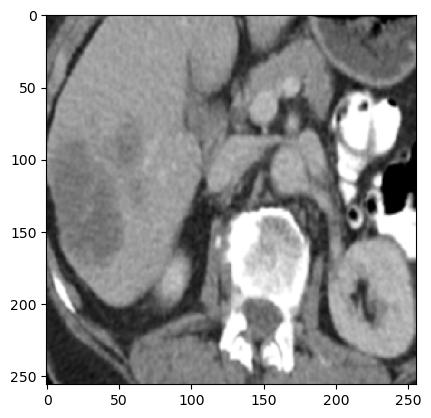

In [90]:
resize_img = resize(img_test_arr)
plt.imshow(resize_img[0,8,:,:],cmap='gray')

In [50]:
model.state_dict()

OrderedDict([('swinViT.patch_embed.proj.weight',
              tensor([[[[[ 0.3788, -0.0219],
                         [-0.2572, -0.2717]],
              
                        [[ 0.3604, -0.3564],
                         [ 0.0700, -0.3148]]]],
              
              
              
                      [[[[ 0.3120,  0.3182],
                         [ 0.2039,  0.3356]],
              
                        [[ 0.1222,  0.2326],
                         [ 0.0917,  0.1525]]]],
              
              
              
                      [[[[ 0.3072, -0.1322],
                         [ 0.2333, -0.1233]],
              
                        [[-0.0891,  0.1359],
                         [-0.0598, -0.3558]]]],
              
              
              
                      [[[[ 0.3524,  0.3916],
                         [ 0.1891, -0.0927]],
              
                        [[-0.1096, -0.1246],
                         [ 0.1393, -0.3804]]]],
              
     

In [56]:
a = torch.arange(1,9).reshape(2,4)
a_row = a[:,:,None]
b = torch.arange(1,9).reshape(2,4)
b_row = b[:,None,:]

In [58]:
b_row.shape

torch.Size([2, 1, 4])